### `Basic analytics on phenotypes`
***

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

`Phenotype derivation`

In [6]:
df = pd.read_csv('../../Pie/25traits.csv')

df['Root_thickness'] = df['Root_weight'] / df['Root_length']
df['Shoot_thickness'] = df['Shoot_weight'] / df['Shoot_length']
df['Stress_Root_thickness'] = df['Stress_Root_weight'] / df['Stress_Root_length']
df['Stress_Shoot_thickness'] = df['Stress_Shoot_weight'] / df['Stress_Shoot_length']

df['Lost_Root_weight'] = df['Root_weight'] - df['Stress_Root_weight']
df['Lost_Shoot_weight'] = df['Shoot_weight'] - df['Stress_Shoot_weight']
df['Lost_Root_length'] = df['Root_length'] - df['Stress_Root_length']
df['Lost_Shoot_length'] = df['Shoot_length'] - df['Stress_Shoot_length']
df['Lost_Root_thickness'] = df['Root_thickness'] - df['Stress_Root_thickness'] 
df['Lost_Shoot_thickness'] = df['Shoot_thickness'] - df['Stress_Shoot_thickness']
df['Lost_Chlorophyll_A'] = df['Chlorophyll_A'] - df['Stress_Chlorophyll_A']
df['Lost_Chlorophyll_B'] = df['Chlorophyll_B'] - df['Stress_Chlorophyll_B']

df['Seed_volume'] = (df['Length_WO_husk'] * df['Height_WO_husk'] * df['Width_WO_husk']) / 1000000
df['Seed_density'] = df['Seed_Weight'] / df['Seed_volume']

In [8]:
df.fillna('NA').to_csv('../../Pie/39traits.csv', index = False)

`normality testing and filtering`

In [19]:
df = pd.read_csv('../../Pie/25traits.csv')

In [3]:
df.corr(method='pearson').to_clipboard()
df.corr(method='spearman').to_clipboard()
df.corr(method='kendall').to_clipboard()

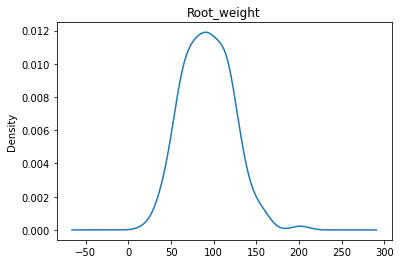

ShapiroResult(statistic=0.9880818128585815, pvalue=0.15779158473014832)


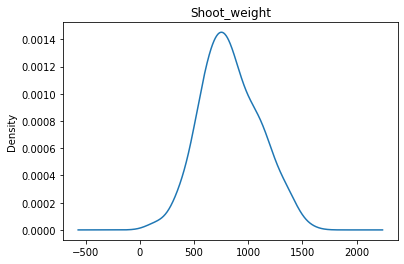

ShapiroResult(statistic=0.9914050102233887, pvalue=0.3984191119670868)


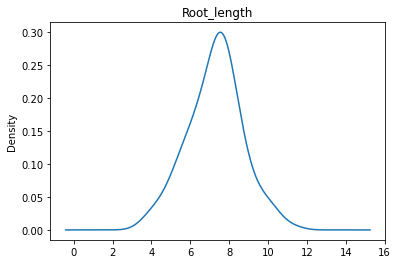

ShapiroResult(statistic=0.9922788739204407, pvalue=0.49492642283439636)


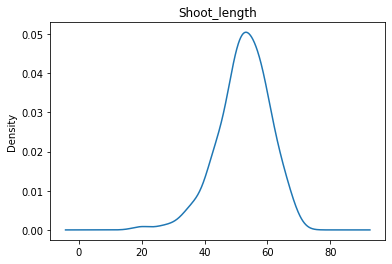

ShapiroResult(statistic=0.9717214107513428, pvalue=0.0014612766681239009)


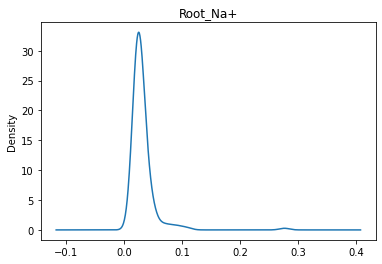

ShapiroResult(statistic=0.4524776339530945, pvalue=1.178572455005358e-22)


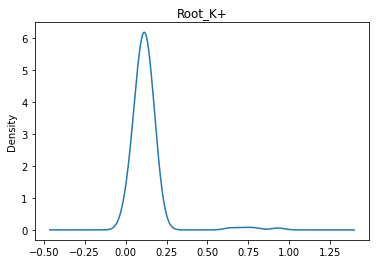

ShapiroResult(statistic=0.528024435043335, pvalue=3.1077264470909614e-21)


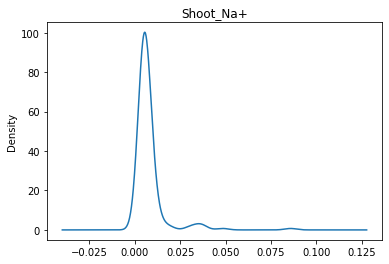

ShapiroResult(statistic=0.4177711009979248, pvalue=2.942179492778616e-23)


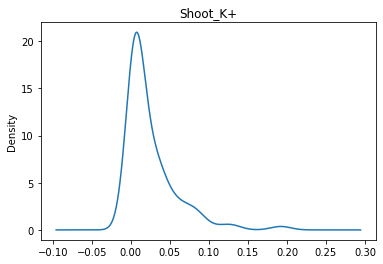

ShapiroResult(statistic=0.6977711915969849, pvalue=2.901246332151344e-17)


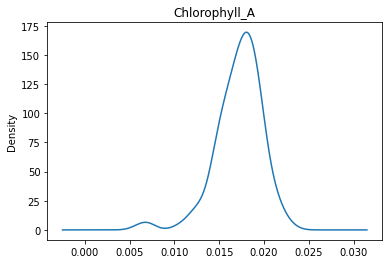

ShapiroResult(statistic=0.9301875233650208, pvalue=2.1915963088758872e-07)


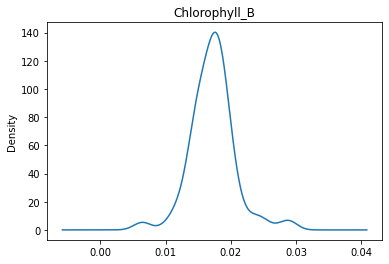

ShapiroResult(statistic=0.9365927577018738, pvalue=6.765499165339861e-07)


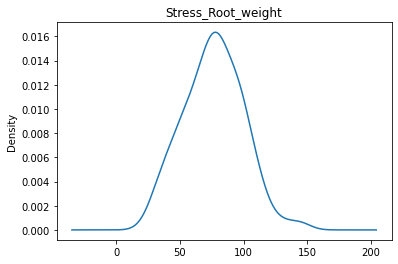

ShapiroResult(statistic=0.9914951920509338, pvalue=0.4122568368911743)


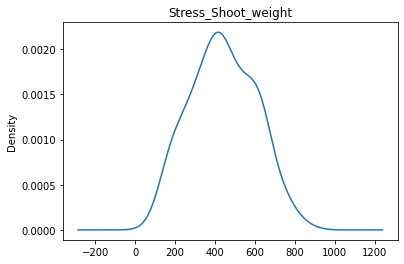

ShapiroResult(statistic=0.9867594838142395, pvalue=0.10901150852441788)


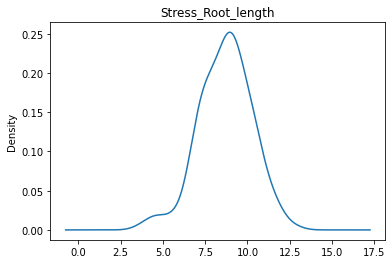

ShapiroResult(statistic=0.9883983731269836, pvalue=0.17611148953437805)


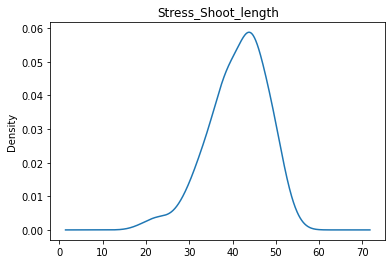

ShapiroResult(statistic=0.9707419872283936, pvalue=0.0011789303971454501)


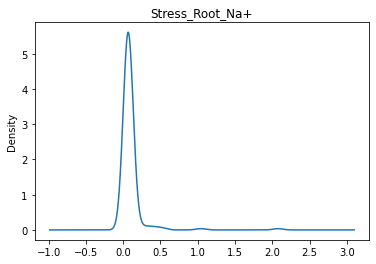

ShapiroResult(statistic=0.22202831506729126, pvalue=3.2550838406356564e-26)


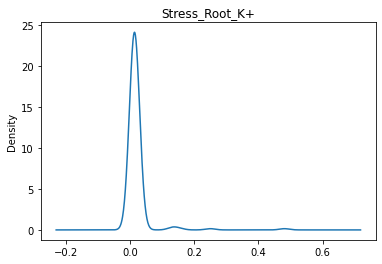

ShapiroResult(statistic=0.20193076133728027, pvalue=1.7514873759676042e-26)


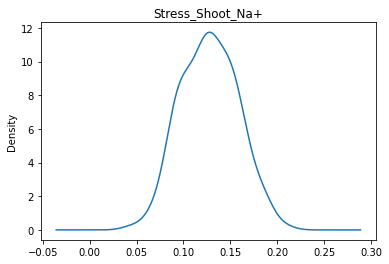

ShapiroResult(statistic=0.9946474432945251, pvalue=0.7981058955192566)


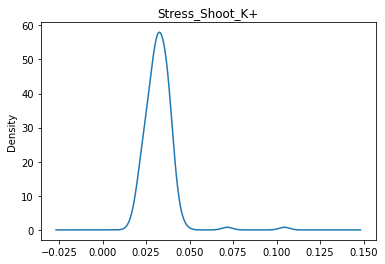

ShapiroResult(statistic=0.7225893139839172, pvalue=1.495963814038235e-16)


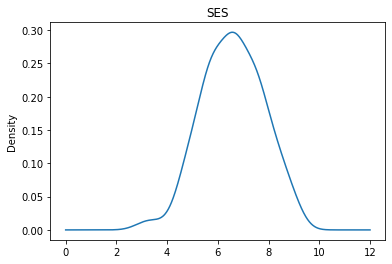

ShapiroResult(statistic=0.9857655763626099, pvalue=0.07596761733293533)


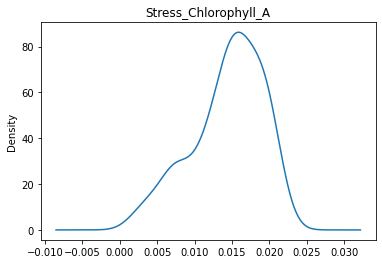

ShapiroResult(statistic=0.9489269256591797, pvalue=6.787707661715103e-06)


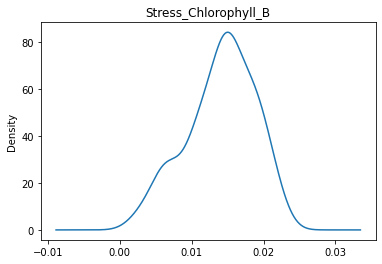

ShapiroResult(statistic=0.9725311994552612, pvalue=0.0016724091256037354)


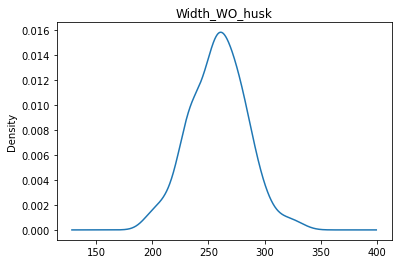

ShapiroResult(statistic=0.995127260684967, pvalue=0.8450956344604492)


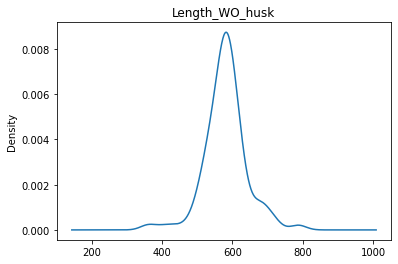

ShapiroResult(statistic=0.9361910820007324, pvalue=5.89620242408273e-07)


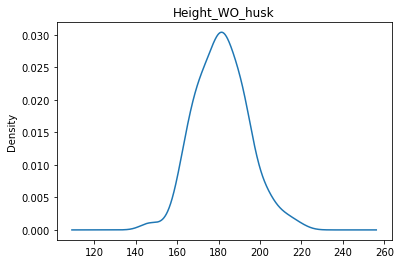

ShapiroResult(statistic=0.9926714301109314, pvalue=0.5332775115966797)


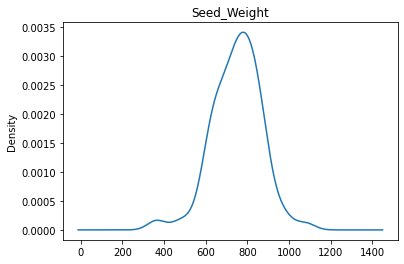

ShapiroResult(statistic=0.9767411947250366, pvalue=0.005322087090462446)


In [108]:
for i in range(1,26):
    df.iloc[:,i].plot(kind = 'kde')
    plt.title(df.columns[i])
    plt.show()  
    print(shapiro(df.iloc[:,i].dropna().values))

In [20]:
def moderate_positive_skew(x):
    return [np.sqrt(n) for n in x]
def moderate_negative_skew(x):
    return [np.sqrt(max(x) + 1 - n) for n in x]
def large_positive_skew(x):
    return np.log10(x)
def large_negative_skew(x):
    return [np.log10(max(x) + 1 - n) for n in x]
def severe_positive_skew(x):
    return [1/n for n in x]
def severe_negative_skew(x):
    return [1/(max(x) + 1 - n) for n in x]

ShapiroResult(statistic=0.9938667416572571, pvalue=0.6959567666053772)


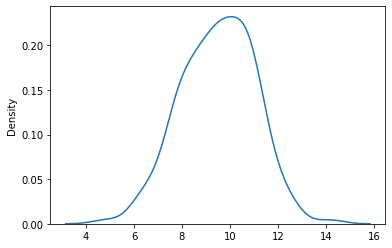

ShapiroResult(statistic=0.9916279911994934, pvalue=0.42173516750335693)


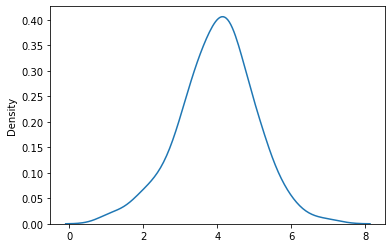

ShapiroResult(statistic=0.9953354001045227, pvalue=0.8746808171272278)


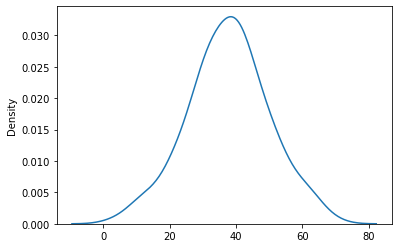

ShapiroResult(statistic=0.9907935261726379, pvalue=0.3436070680618286)


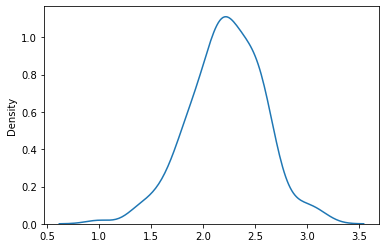

ShapiroResult(statistic=0.9978163838386536, pvalue=0.9980162382125854)


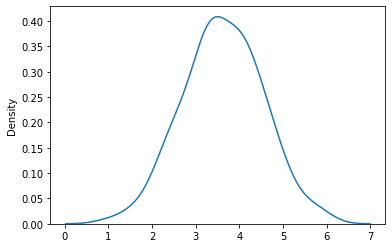

In [110]:
sns.kdeplot(moderate_positive_skew(df.loc[:,'Root_weight'].dropna()))
print(shapiro(moderate_positive_skew(df.loc[:,'Root_weight'].dropna())))
plt.show()
sns.kdeplot(moderate_negative_skew(df.loc[:,'Shoot_length'].dropna()))
print(shapiro(moderate_negative_skew(df.loc[:,'Shoot_length'].dropna())))
plt.show()
sns.kdeplot(severe_positive_skew(df.loc[:,'Root_Na+'].dropna()))
print(shapiro(severe_positive_skew(df.loc[:,'Root_Na+'].dropna())))
plt.show()

#Root_K+ can't be fixed
#Shoot_Na+ can't be fixed
#Shoot_K+ can't be fixed
#Chlorophyll_A and chlorophyll_B coudl not be saved

sns.kdeplot(moderate_negative_skew(df.loc[:,'Stress_Root_length'].dropna()))
print(shapiro(moderate_negative_skew(df.loc[:,'Stress_Root_length'].dropna())))
plt.show()

sns.kdeplot(moderate_negative_skew(df.loc[:,'Stress_Shoot_length'].dropna()))
print(shapiro(moderate_negative_skew(df.loc[:,'Stress_Shoot_length'].dropna())))
plt.show()

#Stress_Root_Na+ can't be saved
#Stress_Shoot_K+ can't be saved
#Stress_chlorophyll_A and Stress_chlorophyll_B are beyond saving

In [21]:
#df['Normalized_Root_weight'] = moderate_positive_skew(df.loc[:,'Root_weight'])
#df['Normalized_Shoot_length'] = moderate_negative_skew(df.loc[:,'Shoot_length'])
df['Normalized_Root_Na+'] = severe_positive_skew(df.loc[:,'Root_Na+'])
#df['Normalized_Stress_Root_length'] = moderate_negative_skew(df.loc[:,'Stress_Root_length'])
#df['Normalized_Stress_Shoot_length'] = moderate_negative_skew(df.loc[:,'Stress_Shoot_length'])

In [22]:
df['Root_thickness'] = df['Root_weight'] / df['Root_length']
df['Shoot_thickness'] = df['Shoot_weight'] / df['Shoot_length']
df['Stress_Root_thickness'] = df['Stress_Root_weight'] / df['Stress_Root_length']
df['Stress_Shoot_thickness'] = df['Stress_Shoot_weight'] / df['Stress_Shoot_length']

df['Lost_Root_weight'] = df['Root_weight'] - df['Stress_Root_weight']
df['Lost_Shoot_weight'] = df['Shoot_weight'] - df['Stress_Shoot_weight']
df['Lost_Root_length'] = df['Root_length'] - df['Stress_Root_length']
df['Lost_Shoot_length'] = df['Shoot_length'] - df['Stress_Shoot_length']
df['Lost_Root_thickness'] = df['Root_thickness'] - df['Stress_Root_thickness'] 
df['Lost_Shoot_thickness'] = df['Shoot_thickness'] - df['Stress_Shoot_thickness']
df['Lost_Chlorophyll_A'] = df['Chlorophyll_A'] - df['Stress_Chlorophyll_A']
df['Lost_Chlorophyll_B'] = df['Chlorophyll_B'] - df['Stress_Chlorophyll_B']

df['Seed_volume'] = (df['Length_WO_husk'] * df['Height_WO_husk'] * df['Width_WO_husk']) / 1000000
df['Seed_density'] = df['Seed_Weight'] / df['Seed_volume']

In [9]:
df.corr(method = 'pearson').to_clipboard()
df.corr(method = 'spearman').to_clipboard()
df.corr(method = 'kendall').to_clipboard()

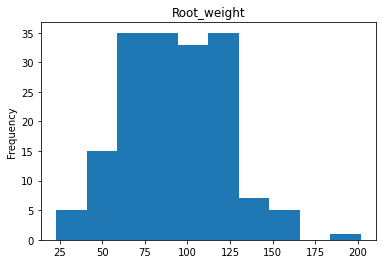

ShapiroResult(statistic=0.9880818128585815, pvalue=0.15779158473014832)


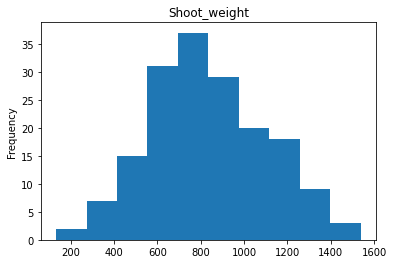

ShapiroResult(statistic=0.9914050102233887, pvalue=0.3984191119670868)


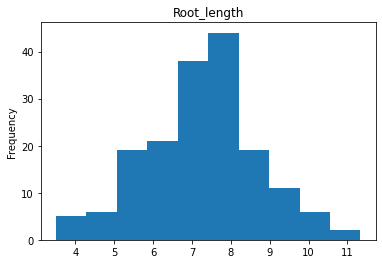

ShapiroResult(statistic=0.9922788739204407, pvalue=0.49492642283439636)


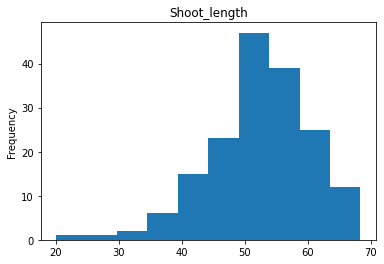

ShapiroResult(statistic=0.9717214107513428, pvalue=0.0014612766681239009)


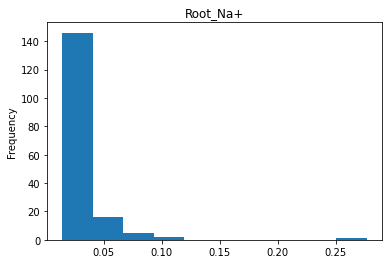

ShapiroResult(statistic=0.4524776339530945, pvalue=1.178572455005358e-22)


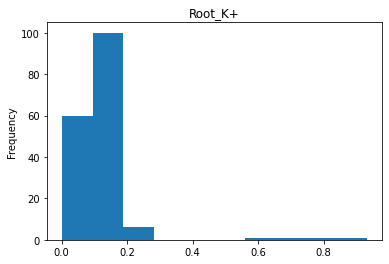

ShapiroResult(statistic=0.528024435043335, pvalue=3.1077264470909614e-21)


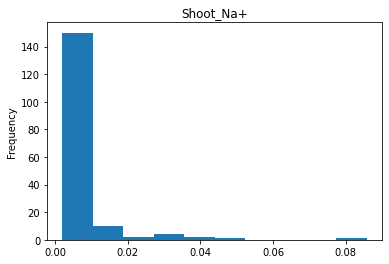

ShapiroResult(statistic=0.4177711009979248, pvalue=2.942179492778616e-23)


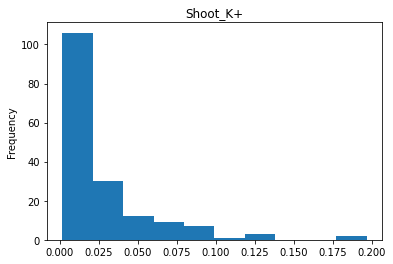

ShapiroResult(statistic=0.6977711915969849, pvalue=2.901246332151344e-17)


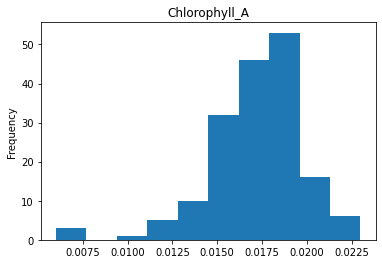

ShapiroResult(statistic=0.9301875233650208, pvalue=2.1915963088758872e-07)


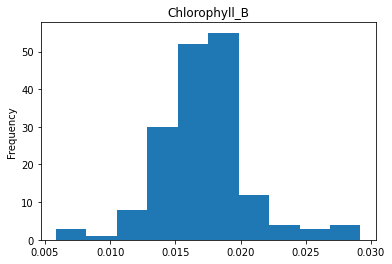

ShapiroResult(statistic=0.9365927577018738, pvalue=6.765499165339861e-07)


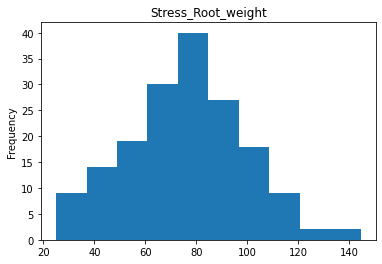

ShapiroResult(statistic=0.9914951920509338, pvalue=0.4122568368911743)


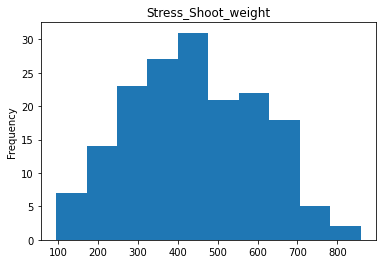

ShapiroResult(statistic=0.9867594838142395, pvalue=0.10901150852441788)


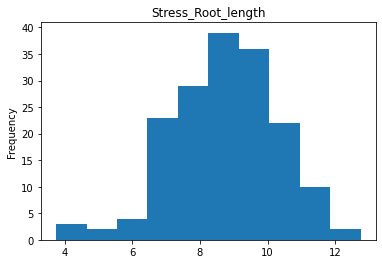

ShapiroResult(statistic=0.9883983731269836, pvalue=0.17611148953437805)


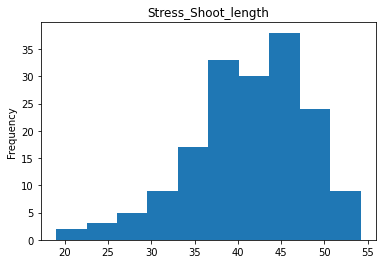

ShapiroResult(statistic=0.9707419872283936, pvalue=0.0011789303971454501)


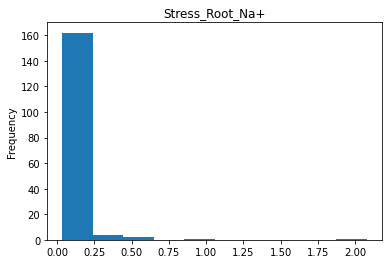

ShapiroResult(statistic=0.22202831506729126, pvalue=3.2550838406356564e-26)


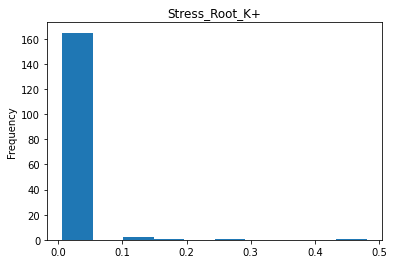

ShapiroResult(statistic=0.20193076133728027, pvalue=1.7514873759676042e-26)


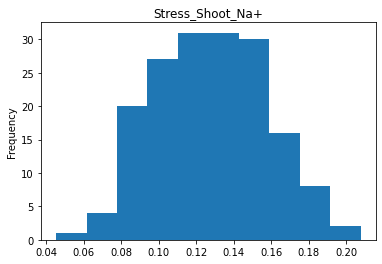

ShapiroResult(statistic=0.9946474432945251, pvalue=0.7981058955192566)


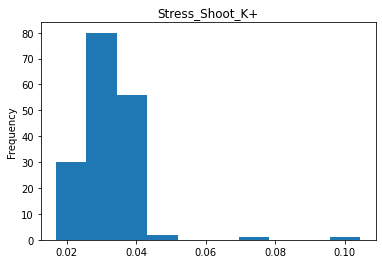

ShapiroResult(statistic=0.7225893139839172, pvalue=1.495963814038235e-16)


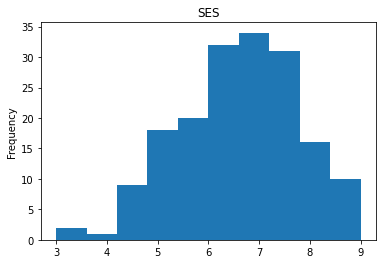

ShapiroResult(statistic=0.9857655763626099, pvalue=0.07596761733293533)


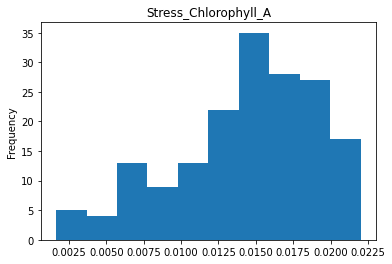

ShapiroResult(statistic=0.9489269256591797, pvalue=6.787707661715103e-06)


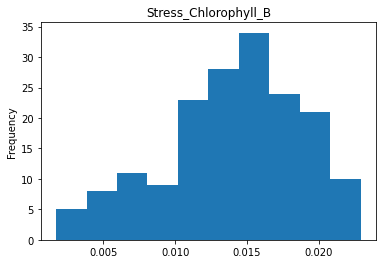

ShapiroResult(statistic=0.9725311994552612, pvalue=0.0016724091256037354)


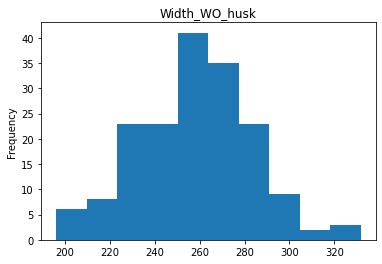

ShapiroResult(statistic=0.995127260684967, pvalue=0.8450956344604492)


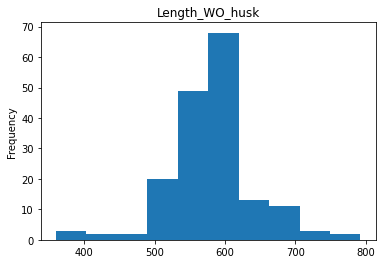

ShapiroResult(statistic=0.9361910820007324, pvalue=5.89620242408273e-07)


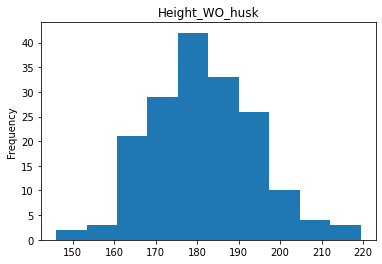

ShapiroResult(statistic=0.9926714301109314, pvalue=0.5332775115966797)


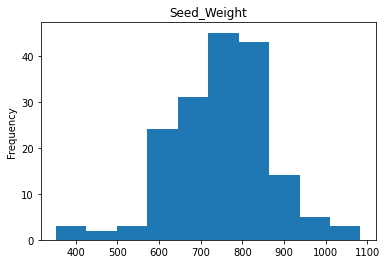

ShapiroResult(statistic=0.9767411947250366, pvalue=0.005322087090462446)


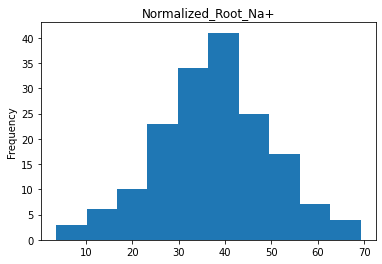

ShapiroResult(statistic=0.9953354001045227, pvalue=0.8746808171272278)


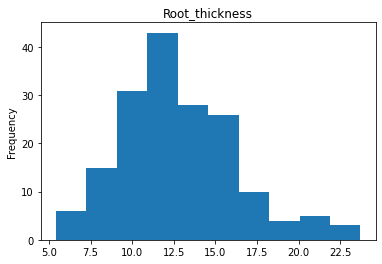

ShapiroResult(statistic=0.9692349433898926, pvalue=0.0007671184721402824)


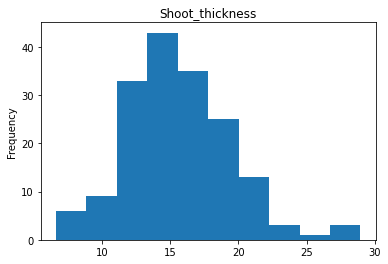

ShapiroResult(statistic=0.9812666773796082, pvalue=0.020884061232209206)


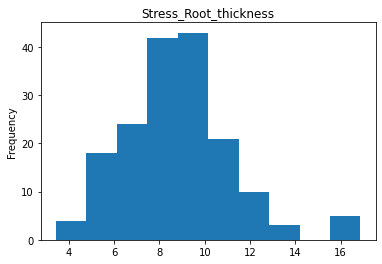

ShapiroResult(statistic=0.9632413387298584, pvalue=0.00018418220861349255)


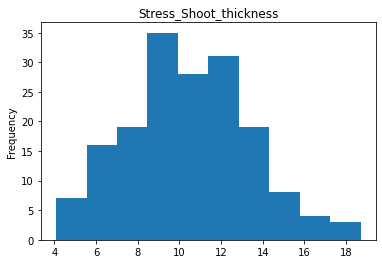

ShapiroResult(statistic=0.9918160438537598, pvalue=0.4467044472694397)


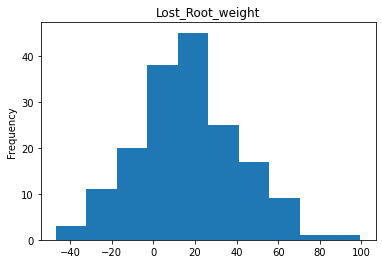

ShapiroResult(statistic=0.9943187832832336, pvalue=0.7576904296875)


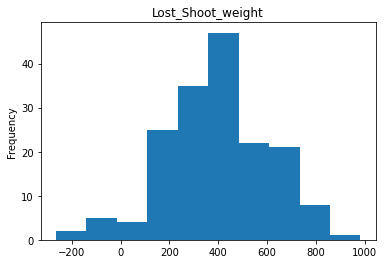

ShapiroResult(statistic=0.9910948872566223, pvalue=0.3719472885131836)


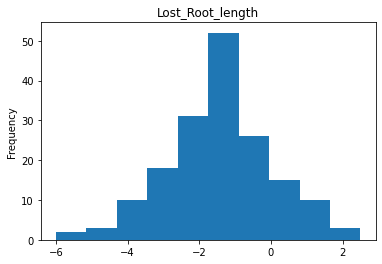

ShapiroResult(statistic=0.9888885021209717, pvalue=0.2027621865272522)


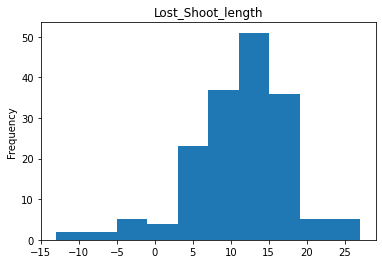

ShapiroResult(statistic=0.9534452557563782, pvalue=2.058040081465151e-05)


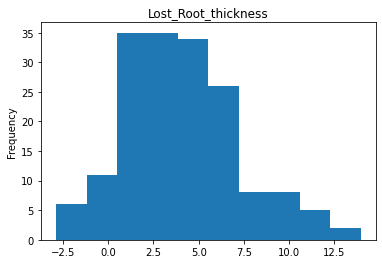

ShapiroResult(statistic=0.9784520268440247, pvalue=0.009563195519149303)


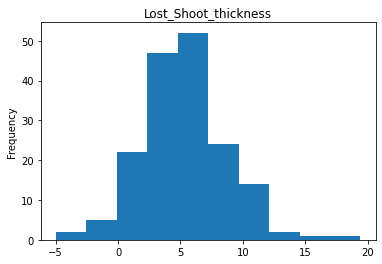

ShapiroResult(statistic=0.9814320206642151, pvalue=0.0225661713629961)


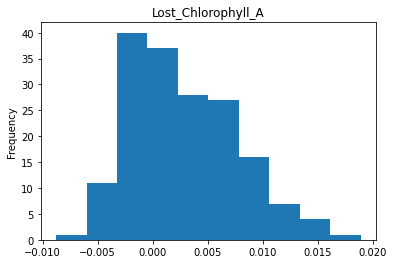

ShapiroResult(statistic=0.975374162197113, pvalue=0.003765910165384412)


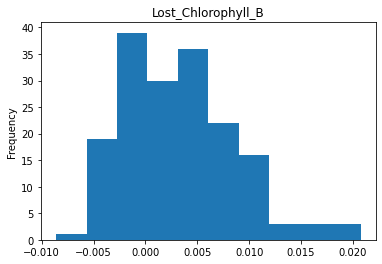

ShapiroResult(statistic=0.9689472317695618, pvalue=0.0006827947800047696)


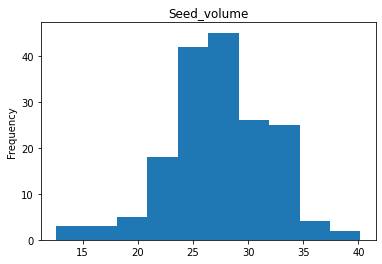

ShapiroResult(statistic=0.9839789271354675, pvalue=0.044304922223091125)


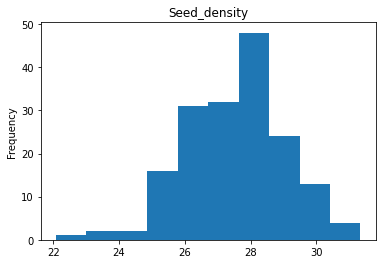

ShapiroResult(statistic=0.9916640520095825, pvalue=0.4165794253349304)


In [114]:
for i in range(1,df.shape[1]):
    df.iloc[:,i].plot(kind = 'hist')
    plt.title(df.columns[i])
    plt.show()  
    print(shapiro(df.iloc[:,i].dropna().values))

<AxesSubplot:ylabel='Frequency'>

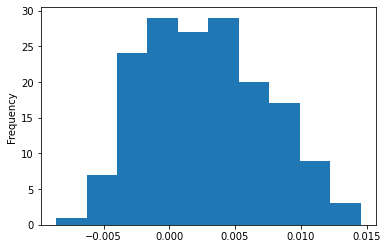

In [115]:
df['Lost_Chlorophyll_B'][df['Lost_Chlorophyll_B'] < 0.015].dropna().plot(kind = 'hist')

In [116]:
len(df['Lost_Chlorophyll_B'][df['Lost_Chlorophyll_B'] < 0.015].dropna())

166

In [117]:
shapiro(df['Lost_Chlorophyll_B'][df['Lost_Chlorophyll_B'] < 0.015].dropna())

ShapiroResult(statistic=0.9841431379318237, pvalue=0.05541878938674927)

In [ ]:
RW 
SW
RL
SL -> > 36
RN -> NRN
RK -> < 0.4
SN -> < 0.015
SK -> < 0.12
CA -> > 0.008
CB -> 0.01 < x < 0.025
SRW
SSW
SRL 
SSL -> < 30
SRN -> < 0.085
SRK -> < 0.023
SSN
SSK -> < 0.06
SES
SCA -> > 0.008
SCB -> > 0.008
W
L 450 < x < 700
H
SW > 500

RT -> < 20
ST -> < 26
SRT -> < 15
SST
LSL -> > 0
LRT -> < 11
LST -> < 18
LCA -> < 0.014
LCB -> < 0.015

In [23]:
df['Filtered_Shoot_length'] = df['Shoot_length']
df['Filtered_Shoot_length'][df['Filtered_Shoot_length'] < 37] = np.nan

df['Filtered_Root_K+'] = df['Root_K+']
df['Filtered_Root_K+'][df['Filtered_Root_K+'] > 0.4] = np.nan

df['Filtered_Shoot_Na+'] = df['Shoot_Na+']
df['Filtered_Shoot_Na+'][df['Filtered_Shoot_Na+'] > 0.009] = np.nan

df['Filtered_Shoot_K+'] = df['Shoot_K+']
df['Filtered_Shoot_K+'][df['Filtered_Shoot_K+'] > 0.12] = np.nan

df['Filtered_Chlorophyll_A'] = df['Chlorophyll_A']
df['Filtered_Chlorophyll_A'][df['Filtered_Chlorophyll_A'] < 0.008] = np.nan

df['Filtered_Chlorophyll_B'] = df['Chlorophyll_B']
df['Filtered_Chlorophyll_B'][df['Filtered_Chlorophyll_B'] < 0.01] = np.nan
df['Filtered_Chlorophyll_B'][df['Filtered_Chlorophyll_B'] > 0.025] = np.nan

df['Filtered_Stress_Shoot_length'] = df['Stress_Shoot_length']
df['Filtered_Stress_Shoot_length'][df['Filtered_Stress_Shoot_length'] < 30] = np.nan

df['Filtered_Stress_Root_Na+'] = df['Stress_Root_Na+']
df['Filtered_Stress_Root_Na+'][df['Filtered_Stress_Root_Na+'] > 0.085] = np.nan

df['Filtered_Stress_Root_K+'] = df['Stress_Root_K+']
df['Filtered_Stress_Root_K+'][df['Filtered_Stress_Root_K+'] > 0.022] = np.nan

df['Filtered_Stress_Shoot_K+'] = df['Stress_Shoot_K+']
df['Filtered_Stress_Shoot_K+'][df['Filtered_Stress_Shoot_K+'] > 0.06] = np.nan

df['Filtered_Stress_Chlorophyll_A'] = df['Stress_Chlorophyll_A']
df['Filtered_Stress_Chlorophyll_A'][df['Filtered_Stress_Chlorophyll_A'] < 0.009] = np.nan

df['Filtered_Stress_Chlorophyll_B'] = df['Stress_Chlorophyll_B']
df['Filtered_Stress_Chlorophyll_B'][df['Filtered_Stress_Chlorophyll_B'] < 0.008] = np.nan

df['Filtered_Length_WO_husk'] = df['Length_WO_husk']
df['Filtered_Length_WO_husk'][df['Filtered_Length_WO_husk'] < 450] = np.nan
df['Filtered_Length_WO_husk'][df['Filtered_Length_WO_husk'] > 700] = np.nan

df['Filtered_Seed_Weight'] = df['Seed_Weight']
df['Filtered_Seed_Weight'][df['Filtered_Seed_Weight'] < 500] = np.nan

df['Filtered_Root_thickness'] = df['Root_thickness']
df['Filtered_Root_thickness'][df['Filtered_Root_thickness'] > 19.9] = np.nan

df['Filtered_Shoot_thickness'] = df['Shoot_thickness']
df['Filtered_Shoot_thickness'][df['Filtered_Shoot_thickness'] > 25.9] = np.nan

df['Filtered_Stress_Root_thickness'] = df['Stress_Root_thickness']
df['Filtered_Stress_Root_thickness'][df['Filtered_Stress_Root_thickness'] > 14.9] = np.nan

df['Filtered_Lost_Shoot_length'] = df['Lost_Shoot_length']
df['Filtered_Lost_Shoot_length'][df['Filtered_Lost_Shoot_length'] < 0] = np.nan

df['Filtered_Lost_Root_thickness'] = df['Lost_Root_thickness']
df['Filtered_Lost_Root_thickness'][df['Filtered_Lost_Root_thickness'] > 10] = np.nan

df['Filtered_Lost_Shoot_thickness'] = df['Lost_Shoot_thickness']
df['Filtered_Lost_Shoot_thickness'][df['Filtered_Lost_Shoot_thickness'] > 17] = np.nan

df['Filtered_Lost_Chlorophyll_A'] = df['Lost_Chlorophyll_A']
df['Filtered_Lost_Chlorophyll_A'][df['Filtered_Lost_Chlorophyll_A'] > 0.01] = np.nan

df['Filtered_Lost_Chlorophyll_B'] = df['Lost_Chlorophyll_B']
df['Filtered_Lost_Chlorophyll_B'][df['Filtered_Lost_Chlorophyll_B'] > 0.015] = np.nan

<ipython-input-23-9654cadfd549>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Filtered_Shoot_length'][df['Filtered_Shoot_length'] < 37] = np.nan
<ipython-input-23-9654cadfd549>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Filtered_Root_K+'][df['Filtered_Root_K+'] > 0.4] = np.nan
<ipython-input-23-9654cadfd549>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Filtered_Shoot_Na+'][df['Filtered_Shoot_Na+'] > 0.009] = np

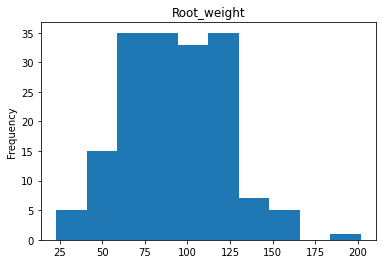

ShapiroResult(statistic=0.9880818128585815, pvalue=0.15779158473014832)


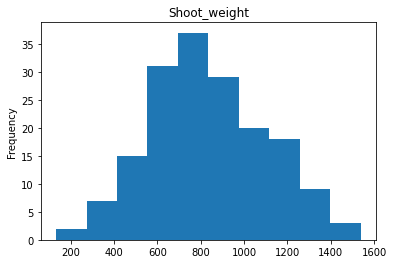

ShapiroResult(statistic=0.9914050102233887, pvalue=0.3984191119670868)


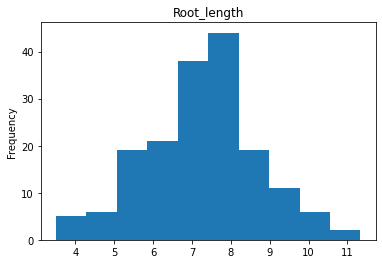

ShapiroResult(statistic=0.9922788739204407, pvalue=0.49492642283439636)


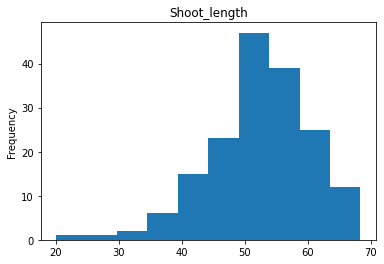

ShapiroResult(statistic=0.9717214107513428, pvalue=0.0014612766681239009)


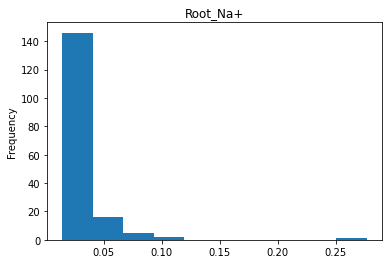

ShapiroResult(statistic=0.4524776339530945, pvalue=1.178572455005358e-22)


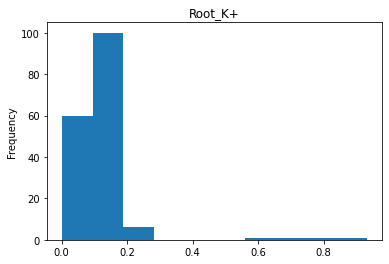

ShapiroResult(statistic=0.528024435043335, pvalue=3.1077264470909614e-21)


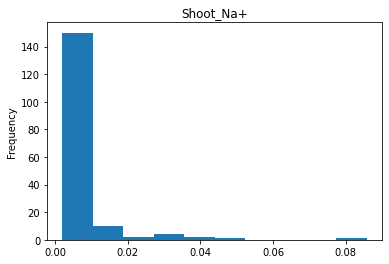

ShapiroResult(statistic=0.4177711009979248, pvalue=2.942179492778616e-23)


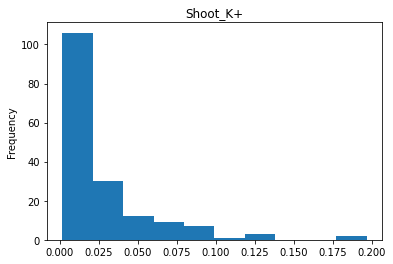

ShapiroResult(statistic=0.6977711915969849, pvalue=2.901246332151344e-17)


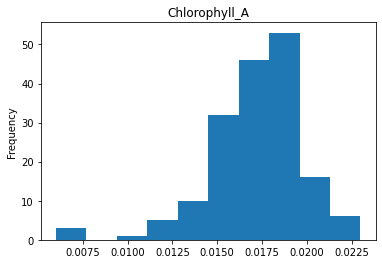

ShapiroResult(statistic=0.9301875233650208, pvalue=2.1915963088758872e-07)


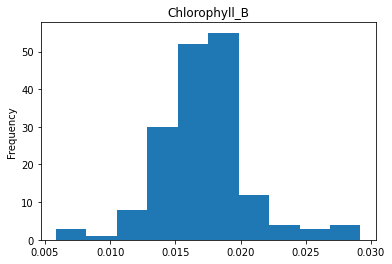

ShapiroResult(statistic=0.9365927577018738, pvalue=6.765499165339861e-07)


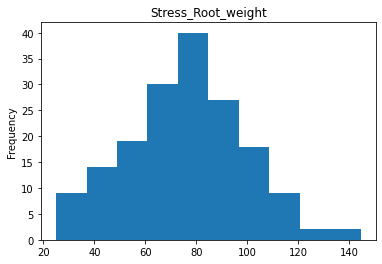

ShapiroResult(statistic=0.9914951920509338, pvalue=0.4122568368911743)


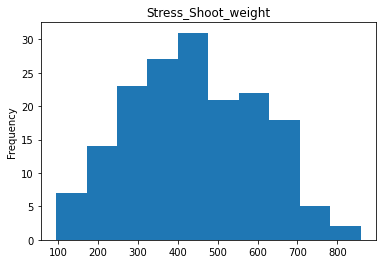

ShapiroResult(statistic=0.9867594838142395, pvalue=0.10901150852441788)


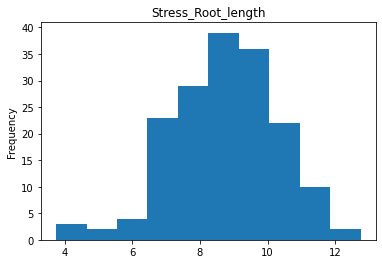

ShapiroResult(statistic=0.9883983731269836, pvalue=0.17611148953437805)


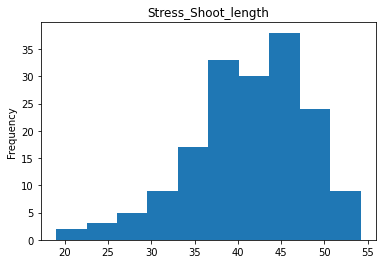

ShapiroResult(statistic=0.9707419872283936, pvalue=0.0011789303971454501)


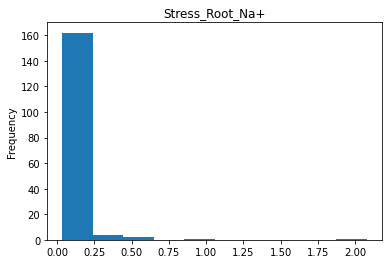

ShapiroResult(statistic=0.22202831506729126, pvalue=3.2550838406356564e-26)


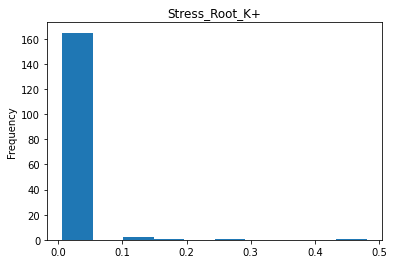

ShapiroResult(statistic=0.20193076133728027, pvalue=1.7514873759676042e-26)


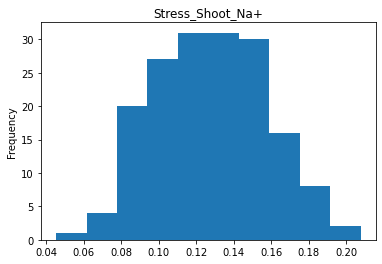

ShapiroResult(statistic=0.9946474432945251, pvalue=0.7981058955192566)


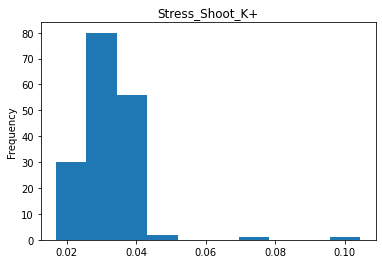

ShapiroResult(statistic=0.7225893139839172, pvalue=1.495963814038235e-16)


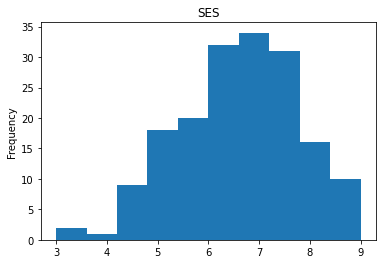

ShapiroResult(statistic=0.9857655763626099, pvalue=0.07596761733293533)


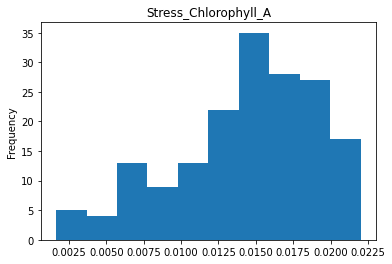

ShapiroResult(statistic=0.9489269256591797, pvalue=6.787707661715103e-06)


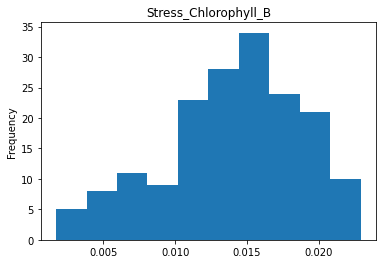

ShapiroResult(statistic=0.9725311994552612, pvalue=0.0016724091256037354)


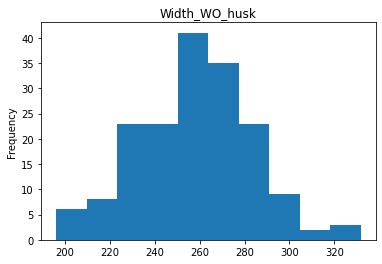

ShapiroResult(statistic=0.995127260684967, pvalue=0.8450956344604492)


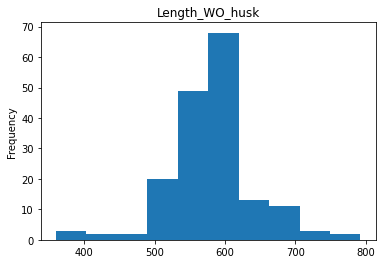

ShapiroResult(statistic=0.9361910820007324, pvalue=5.89620242408273e-07)


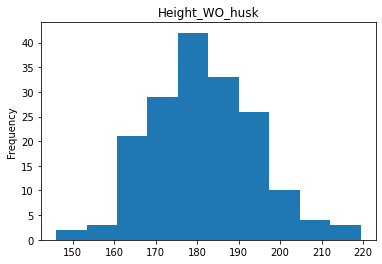

ShapiroResult(statistic=0.9926714301109314, pvalue=0.5332775115966797)


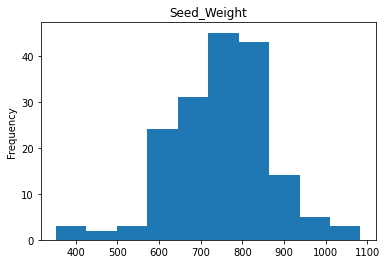

ShapiroResult(statistic=0.9767411947250366, pvalue=0.005322087090462446)


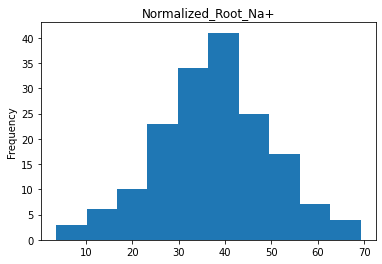

ShapiroResult(statistic=0.9953354001045227, pvalue=0.8746808171272278)


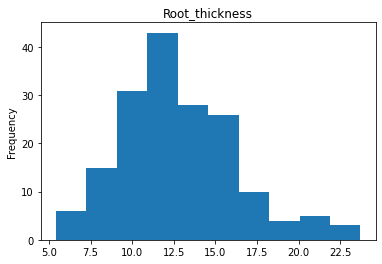

ShapiroResult(statistic=0.9692349433898926, pvalue=0.0007671184721402824)


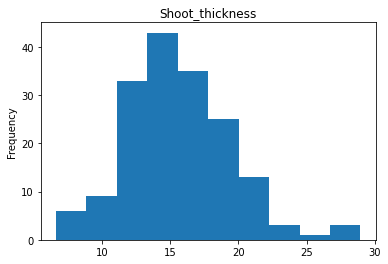

ShapiroResult(statistic=0.9812666773796082, pvalue=0.020884061232209206)


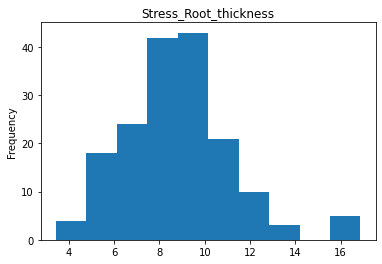

ShapiroResult(statistic=0.9632413387298584, pvalue=0.00018418220861349255)


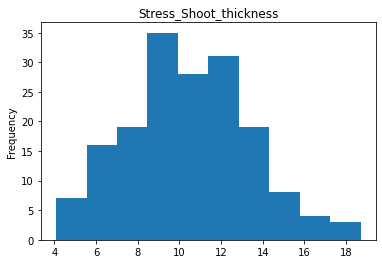

ShapiroResult(statistic=0.9918160438537598, pvalue=0.4467044472694397)


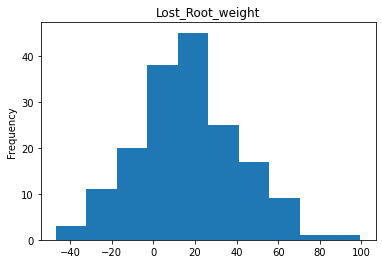

ShapiroResult(statistic=0.9943187832832336, pvalue=0.7576904296875)


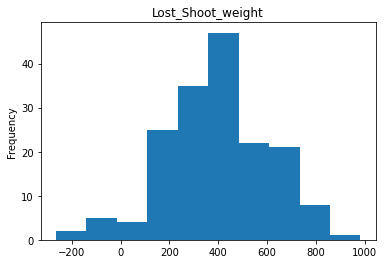

ShapiroResult(statistic=0.9910948872566223, pvalue=0.3719472885131836)


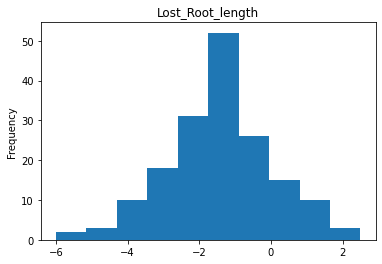

ShapiroResult(statistic=0.9888885021209717, pvalue=0.2027621865272522)


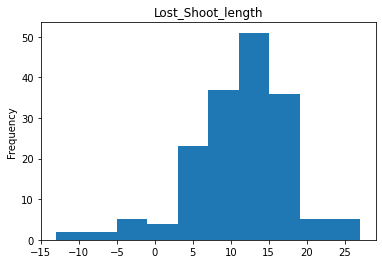

ShapiroResult(statistic=0.9534452557563782, pvalue=2.058040081465151e-05)


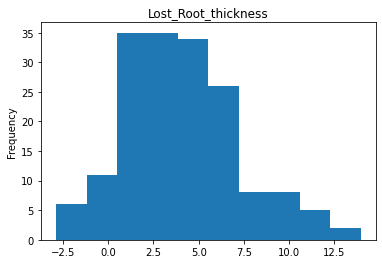

ShapiroResult(statistic=0.9784520268440247, pvalue=0.009563195519149303)


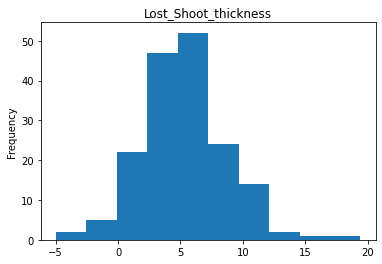

ShapiroResult(statistic=0.9814320206642151, pvalue=0.0225661713629961)


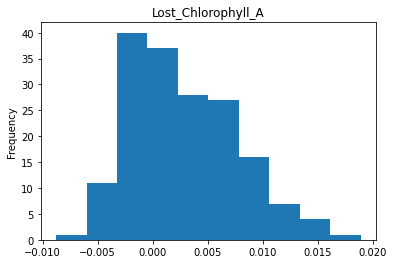

ShapiroResult(statistic=0.975374162197113, pvalue=0.003765910165384412)


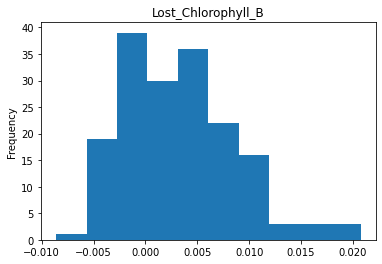

ShapiroResult(statistic=0.9689472317695618, pvalue=0.0006827947800047696)


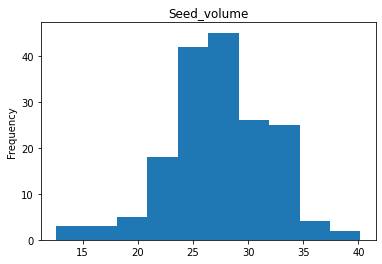

ShapiroResult(statistic=0.9839789271354675, pvalue=0.044304922223091125)


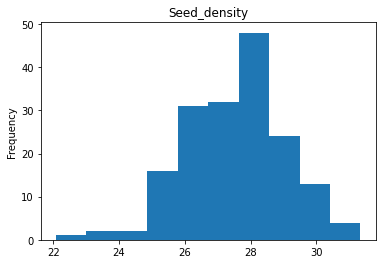

ShapiroResult(statistic=0.9916640520095825, pvalue=0.4165794253349304)


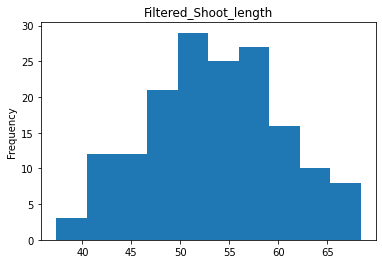

ShapiroResult(statistic=0.9919720888137817, pvalue=0.49707725644111633)


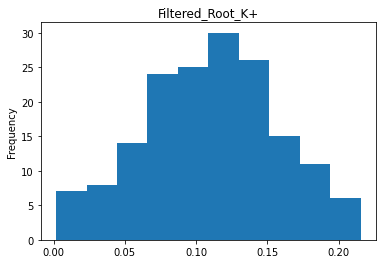

ShapiroResult(statistic=0.9884133338928223, pvalue=0.18959355354309082)


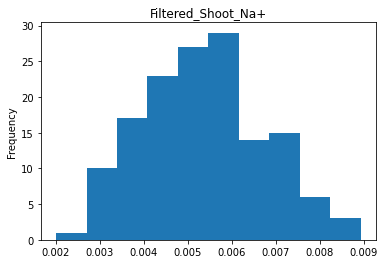

ShapiroResult(statistic=0.9920375347137451, pvalue=0.5942562222480774)


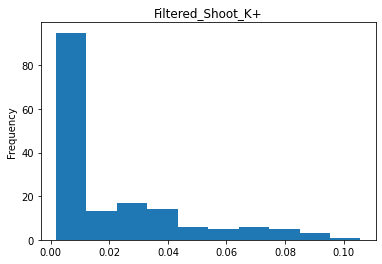

ShapiroResult(statistic=0.7687157392501831, pvalue=7.46767455002146e-15)


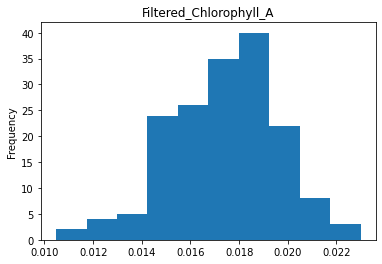

ShapiroResult(statistic=0.9899057745933533, pvalue=0.27395209670066833)


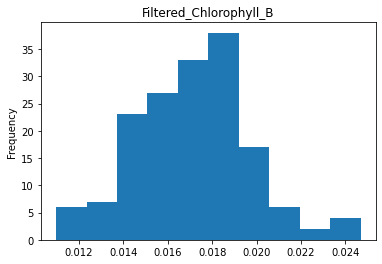

ShapiroResult(statistic=0.9865150451660156, pvalue=0.11737015098333359)


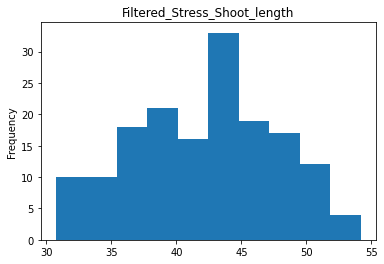

ShapiroResult(statistic=0.9836766719818115, pvalue=0.056455932557582855)


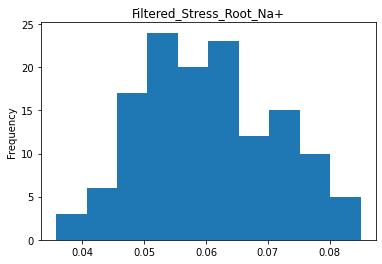

ShapiroResult(statistic=0.9869755506515503, pvalue=0.23137521743774414)


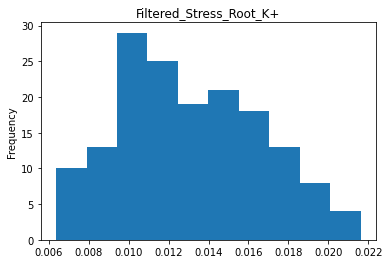

ShapiroResult(statistic=0.9822284579277039, pvalue=0.03765307366847992)


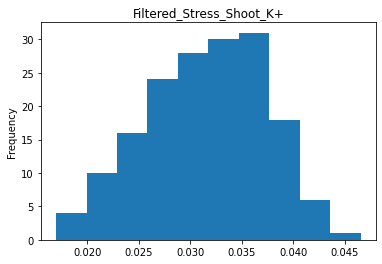

ShapiroResult(statistic=0.9885637164115906, pvalue=0.1911391317844391)


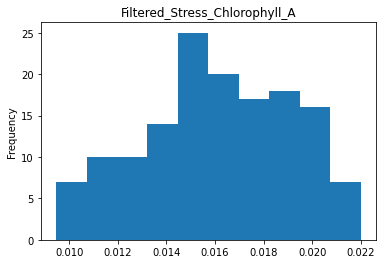

ShapiroResult(statistic=0.9791921377182007, pvalue=0.027349701151251793)


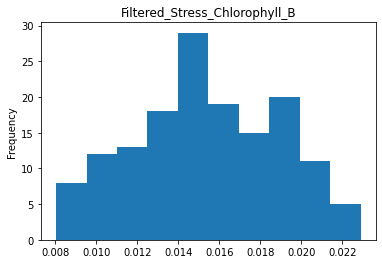

ShapiroResult(statistic=0.9852098226547241, pvalue=0.10922075062990189)


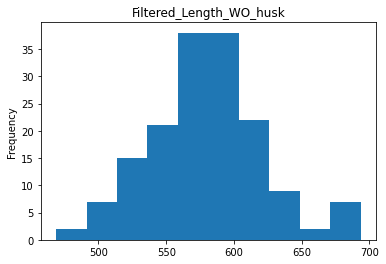

ShapiroResult(statistic=0.9851634502410889, pvalue=0.08369448781013489)


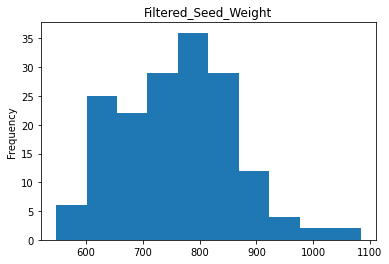

ShapiroResult(statistic=0.9843925833702087, pvalue=0.058138858526945114)


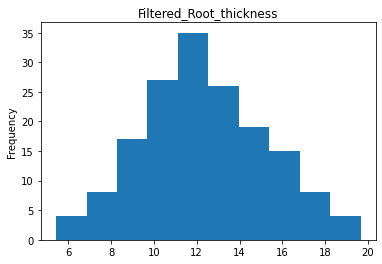

ShapiroResult(statistic=0.9937577247619629, pvalue=0.7141285538673401)


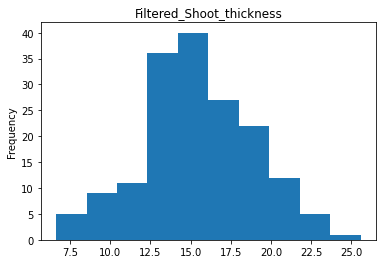

ShapiroResult(statistic=0.9937713742256165, pvalue=0.6956655979156494)


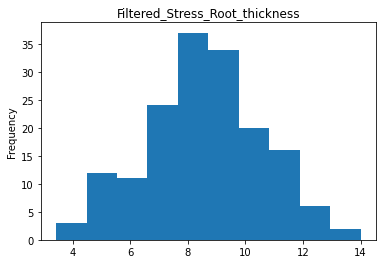

ShapiroResult(statistic=0.995361864566803, pvalue=0.8885082602500916)


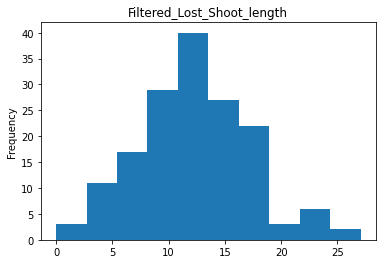

ShapiroResult(statistic=0.9916529059410095, pvalue=0.4762173295021057)


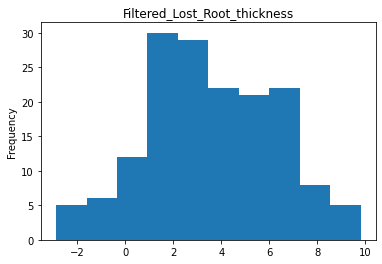

ShapiroResult(statistic=0.9925066828727722, pvalue=0.5737003684043884)


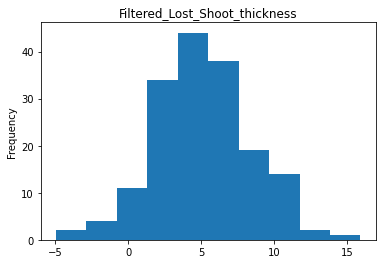

ShapiroResult(statistic=0.9932456016540527, pvalue=0.6238463521003723)


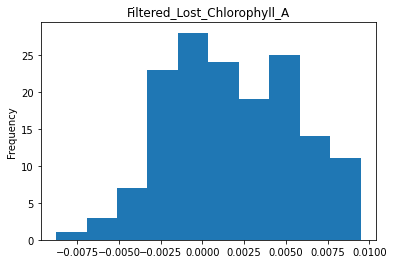

ShapiroResult(statistic=0.9826228618621826, pvalue=0.048183321952819824)


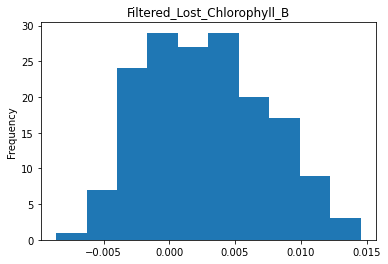

ShapiroResult(statistic=0.9841431379318237, pvalue=0.05541878938674927)


In [120]:
for i in range(1,df.shape[1]):
    df.iloc[:,i].plot(kind = 'hist')
    plt.title(df.columns[i])
    plt.show()  
    print(shapiro(df.iloc[:,i].dropna().values))

In [24]:
df = df[['accession_name', 'Root_weight', 'Shoot_weight', 'Root_length', 'Filtered_Shoot_length', 
         'Filtered_Root_thickness', 'Filtered_Shoot_thickness',
         'Stress_Root_weight', 'Stress_Shoot_weight', 'Stress_Root_length', 'Filtered_Stress_Shoot_length',
         'Filtered_Stress_Root_thickness', 'Stress_Shoot_thickness',
          'Lost_Root_weight', 'Lost_Shoot_weight', 'Lost_Root_length', 'Filtered_Lost_Shoot_length',
         'Filtered_Lost_Root_thickness', 'Filtered_Lost_Shoot_thickness',
         'Normalized_Root_Na+', 'Filtered_Root_K+', 'Filtered_Shoot_Na+', 'Filtered_Shoot_K+', 
         'Filtered_Stress_Root_Na+', 'Filtered_Stress_Root_K+', 'Stress_Shoot_Na+', 'Filtered_Stress_Shoot_K+',
         'Filtered_Chlorophyll_A', 'Filtered_Chlorophyll_B', 'Filtered_Stress_Chlorophyll_A', 'Filtered_Stress_Chlorophyll_B',
         'Filtered_Lost_Chlorophyll_A', 'Filtered_Lost_Chlorophyll_B', 'SES',
         'Filtered_Length_WO_husk', 'Height_WO_husk', 'Width_WO_husk', 'Seed_volume', 'Filtered_Seed_Weight', 'Seed_density']]

In [100]:
shapiro(df.iloc[:,i].dropna())[0]

0.9916640520095825

In [25]:
l = []

dfo = pd.read_csv('../../Pie/39traits.csv')[['accession_name', 'Root_weight', 'Shoot_weight', 'Root_length', 'Shoot_length', 
         'Root_thickness', 'Shoot_thickness',
         'Stress_Root_weight', 'Stress_Shoot_weight', 'Stress_Root_length', 'Stress_Shoot_length',
         'Stress_Root_thickness', 'Stress_Shoot_thickness',
          'Lost_Root_weight', 'Lost_Shoot_weight', 'Lost_Root_length', 'Lost_Shoot_length',
         'Lost_Root_thickness', 'Lost_Shoot_thickness',
         'Root_Na+', 'Root_K+', 'Shoot_Na+', 'Shoot_K+', 
         'Stress_Root_Na+', 'Stress_Root_K+', 'Stress_Shoot_Na+', 'Stress_Shoot_K+',
         'Chlorophyll_A', 'Chlorophyll_B', 'Stress_Chlorophyll_A', 'Stress_Chlorophyll_B',
         'Lost_Chlorophyll_A', 'Lost_Chlorophyll_B', 'SES',
         'Length_WO_husk', 'Height_WO_husk', 'Width_WO_husk', 'Seed_volume', 'Seed_Weight', 'Seed_density']]


for i in range(1, df.shape[1]):
    print(df.columns[i])
    print(len(df.iloc[:,i].dropna()))
    print(shapiro(df.iloc[:,i].dropna()))
    
    l.append((df.columns[i], shapiro(dfo.iloc[:,i].dropna())[0], shapiro(dfo.iloc[:,i].dropna())[1],
              (len(dfo.iloc[:,i].dropna()) - len(df.iloc[:,i].dropna())),
              shapiro(df.iloc[:,i].dropna())[0], shapiro(df.iloc[:,i].dropna())[1]))

Root_weight
171
ShapiroResult(statistic=0.9880818128585815, pvalue=0.15779158473014832)
Shoot_weight
171
ShapiroResult(statistic=0.9914050102233887, pvalue=0.3984191119670868)
Root_length
171
ShapiroResult(statistic=0.9922788739204407, pvalue=0.49492642283439636)
Filtered_Shoot_length
163
ShapiroResult(statistic=0.9919720888137817, pvalue=0.49707725644111633)
Filtered_Root_thickness
163
ShapiroResult(statistic=0.9937577247619629, pvalue=0.7141285538673401)
Filtered_Shoot_thickness
168
ShapiroResult(statistic=0.9937713742256165, pvalue=0.6956655979156494)
Stress_Root_weight
170
ShapiroResult(statistic=0.9914951920509338, pvalue=0.4122568368911743)
Stress_Shoot_weight
170
ShapiroResult(statistic=0.9867594838142395, pvalue=0.10901150852441788)
Stress_Root_length
170
ShapiroResult(statistic=0.9883983731269836, pvalue=0.17611148953437805)
Filtered_Stress_Shoot_length
160
ShapiroResult(statistic=0.9836766719818115, pvalue=0.056455932557582855)
Filtered_Stress_Root_thickness
165
ShapiroResult

In [137]:
pd.DataFrame(l, columns= ['Trait', 'Shapiro-Wilk statistic', 'Shapiro test p-value', 
                         'Number of observations removed', 'Shapiro statistic after filtering', 'p-value after filtering']).to_csv('../Figures and tables/Assessment of normal distributions.csv', index = False)

Root_weight


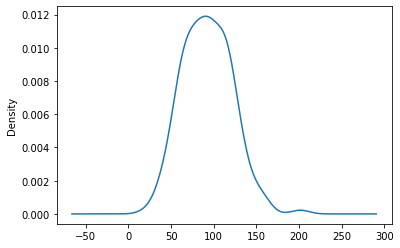

Shoot_weight


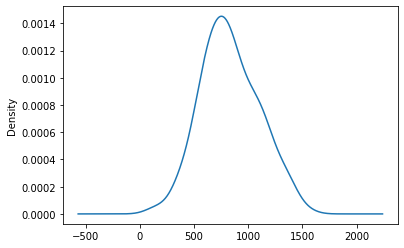

Root_length


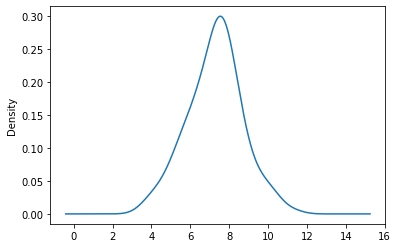

Filtered_Shoot_length


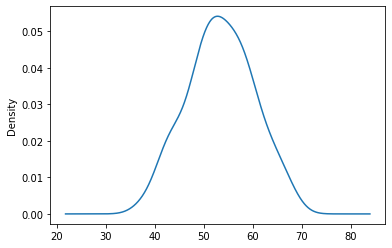

Filtered_Root_thickness


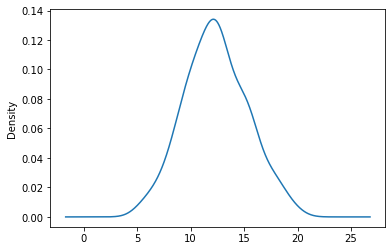

Filtered_Shoot_thickness


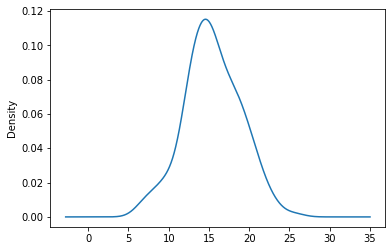

Stress_Root_weight


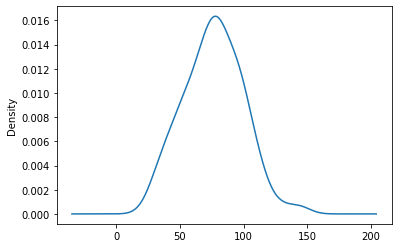

Stress_Shoot_weight


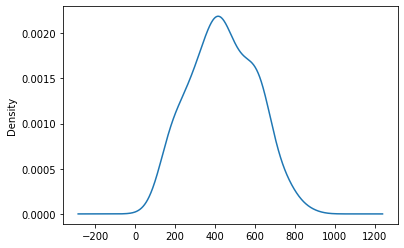

Stress_Root_length


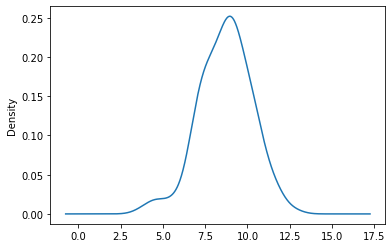

Filtered_Stress_Shoot_length


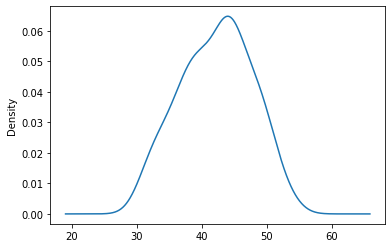

Filtered_Stress_Root_thickness


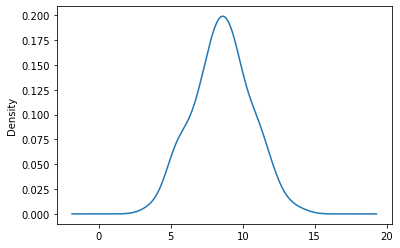

Stress_Shoot_thickness


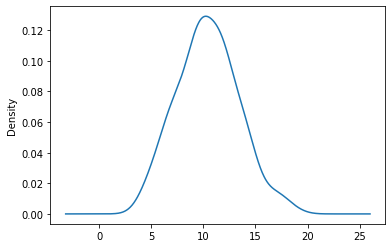

Lost_Root_weight


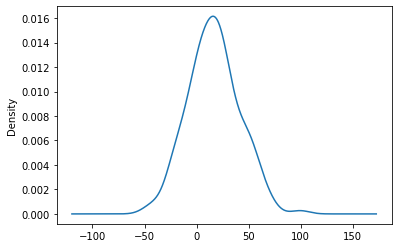

Lost_Shoot_weight


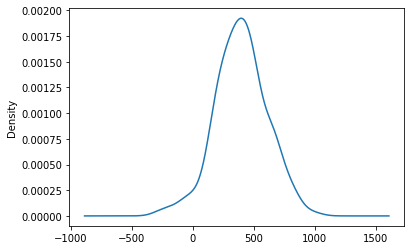

Lost_Root_length


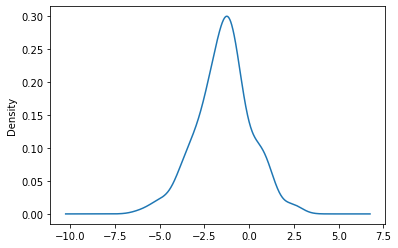

Filtered_Lost_Shoot_length


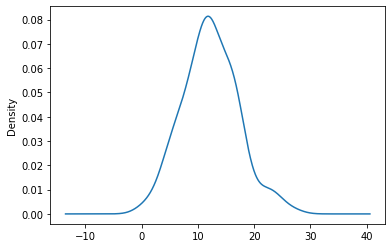

Filtered_Lost_Root_thickness


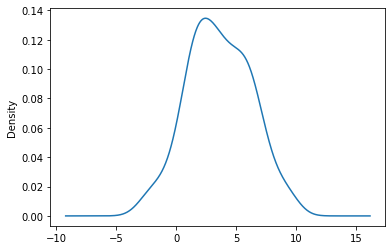

Filtered_Lost_Shoot_thickness


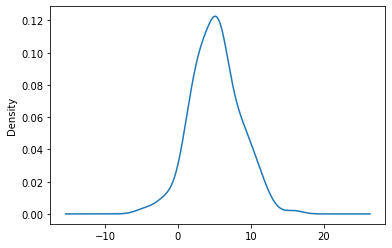

Normalized_Root_Na+


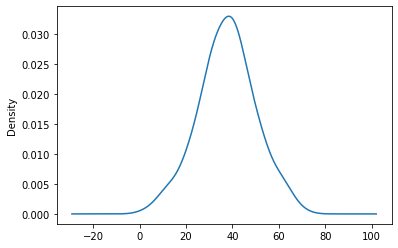

Filtered_Root_K+


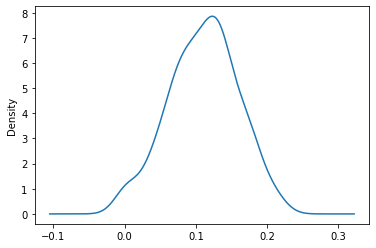

Filtered_Shoot_Na+


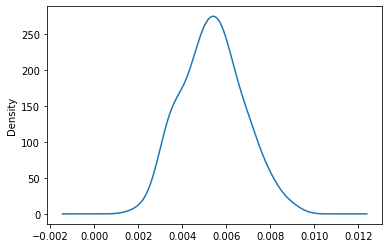

Filtered_Stress_Root_Na+


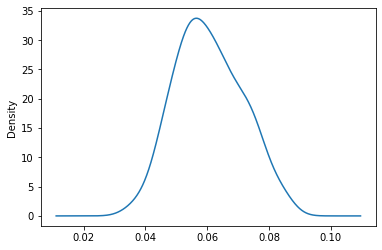

Filtered_Stress_Root_K+


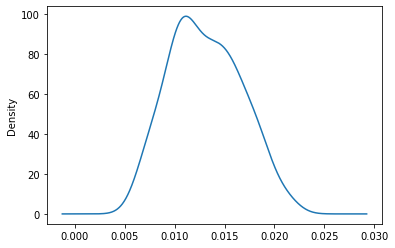

Stress_Shoot_Na+


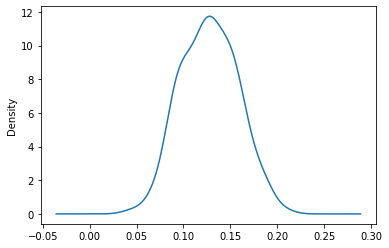

Filtered_Stress_Shoot_K+


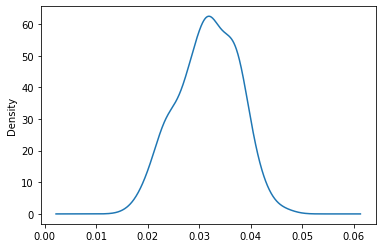

Filtered_Chlorophyll_A


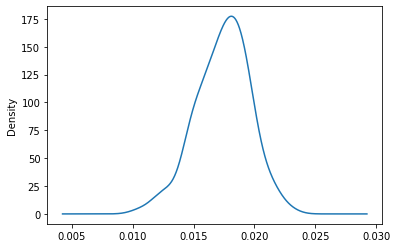

Filtered_Chlorophyll_B


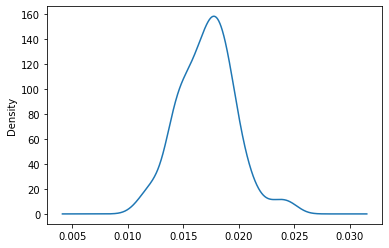

Filtered_Stress_Chlorophyll_A


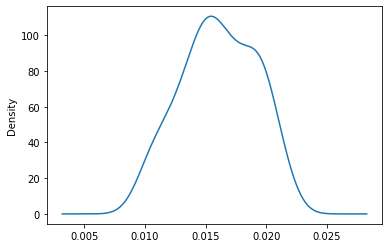

Filtered_Stress_Chlorophyll_B


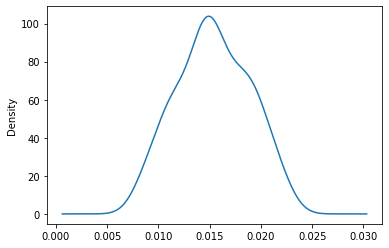

Filtered_Lost_Chlorophyll_A


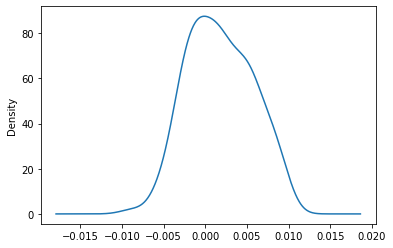

Filtered_Lost_Chlorophyll_B


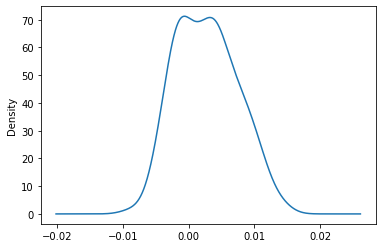

SES


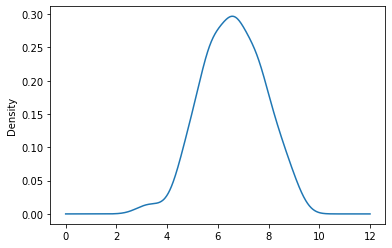

Filtered_Length_WO_husk


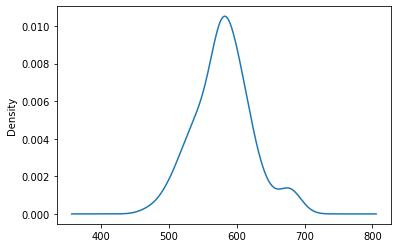

Height_WO_husk


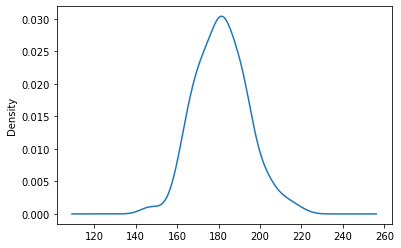

Width_WO_husk


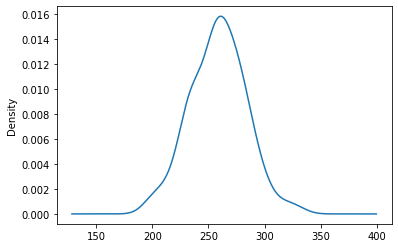

Seed_volume


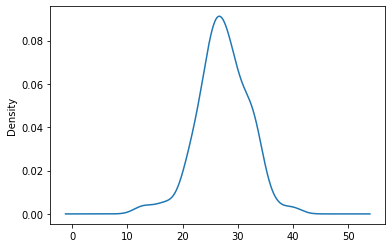

Filtered_Seed_Weight


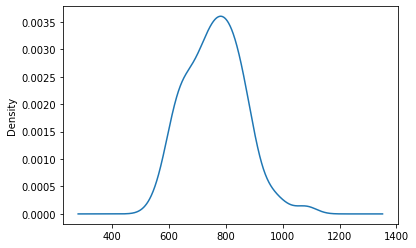

Seed_density


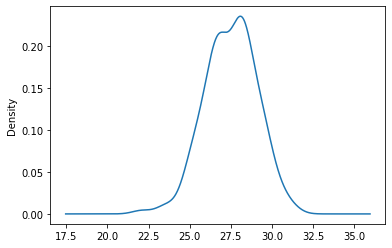

In [96]:
for i in range(1, df.shape[1]):
    print(df.columns[i])
    df.iloc[:,i].plot(kind='kde')
    plt.show()

In [26]:
df.to_csv('../../Pie/39ProcessedTraits.csv', index = False)
df3 = pd.read_csv('../../Pie/39ProcessedTraits.csv', header = None)
np.savetxt('../../Pie/39ProcessedTraits.txt', df3.fillna('NA').values, fmt = '%s', delimiter="\t")  

`Density plots`

c:\users\michael\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


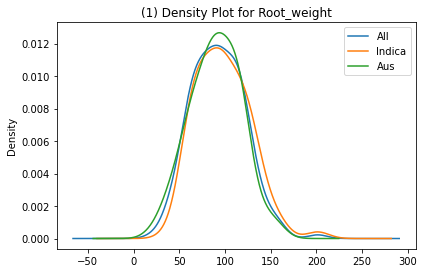

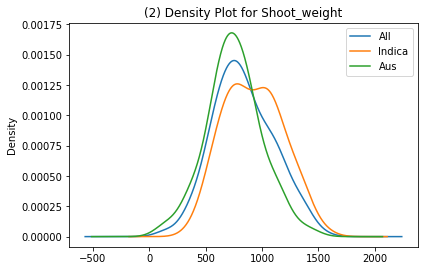

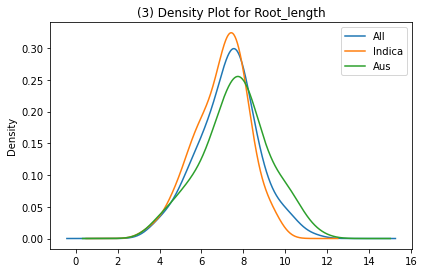

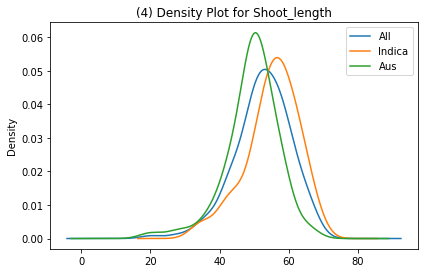

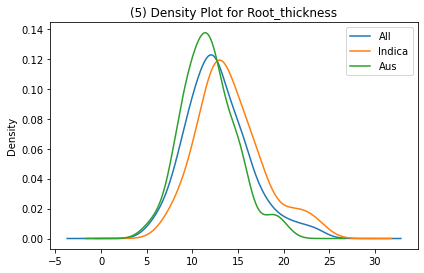

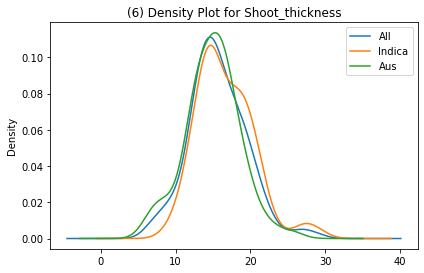

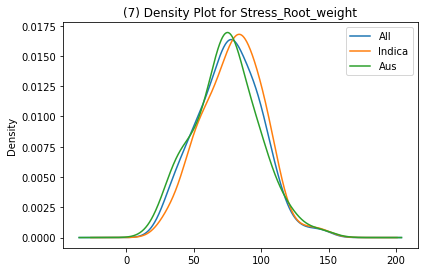

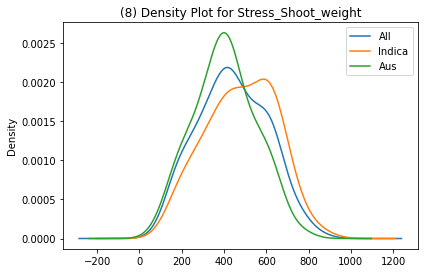

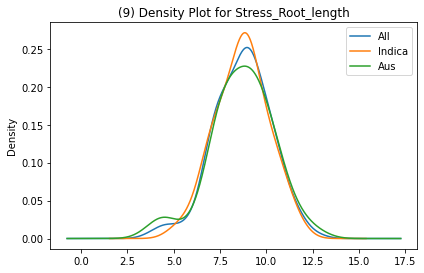

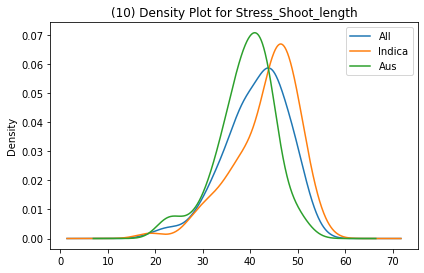

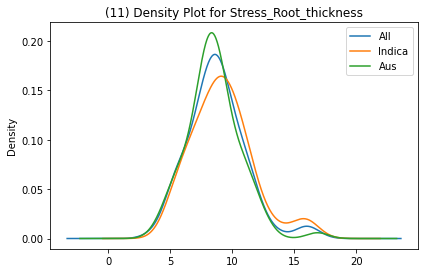

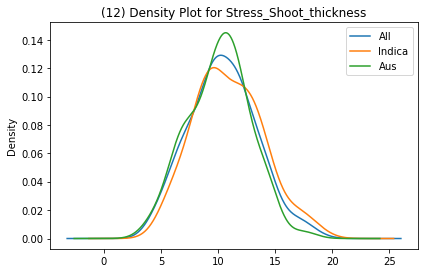

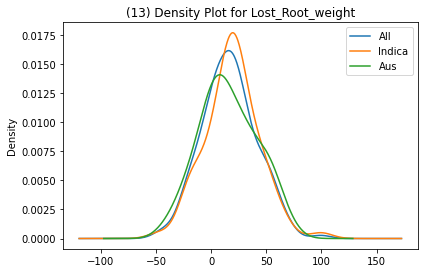

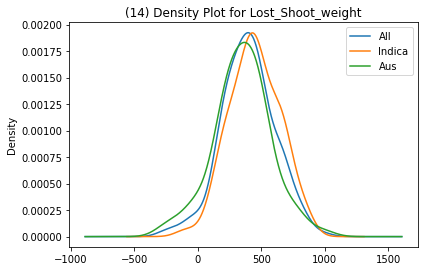

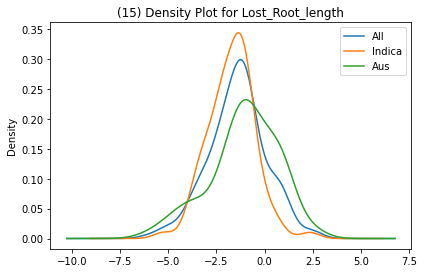

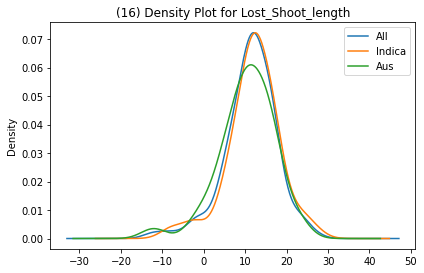

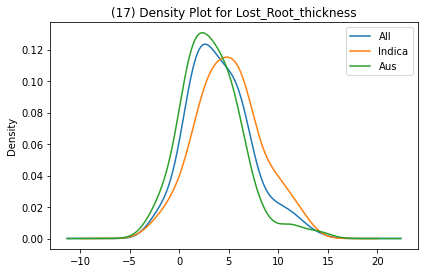

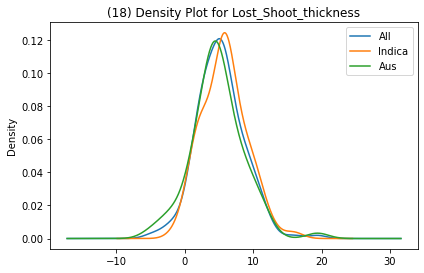

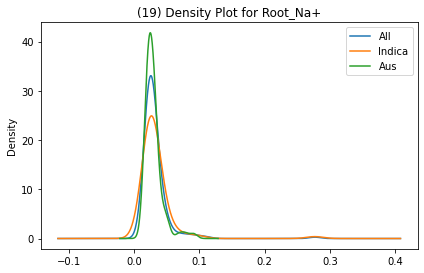

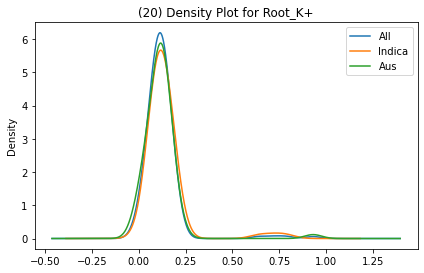

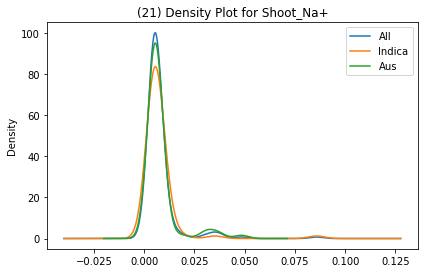

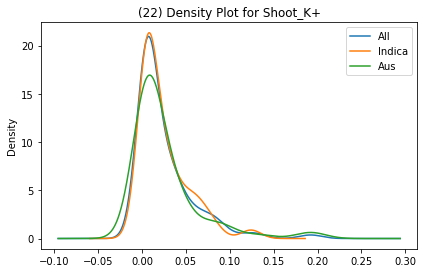

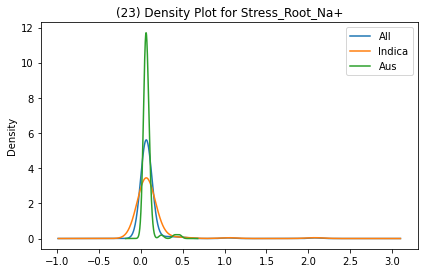

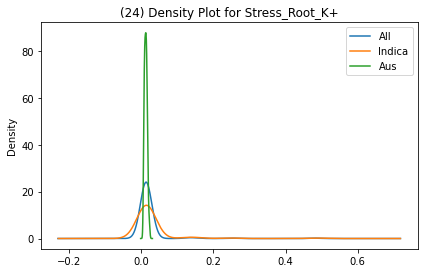

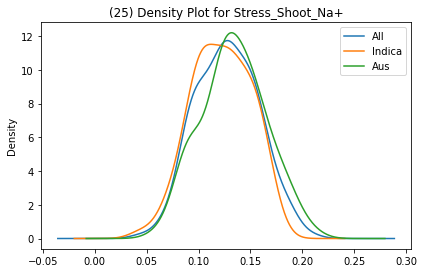

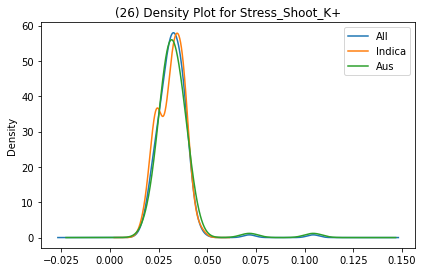

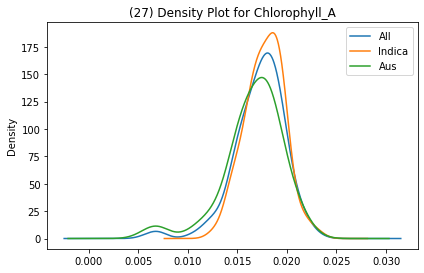

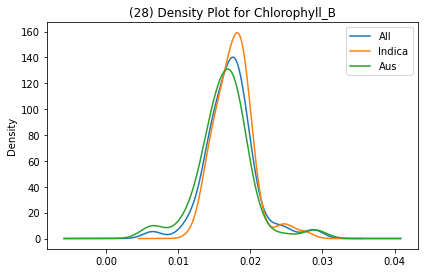

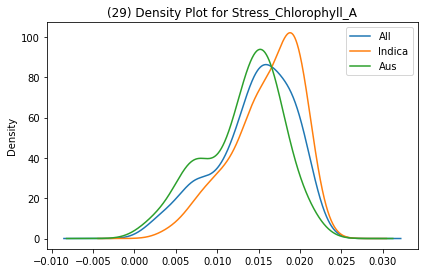

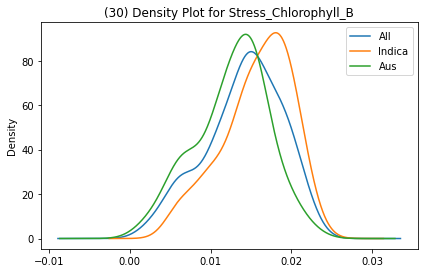

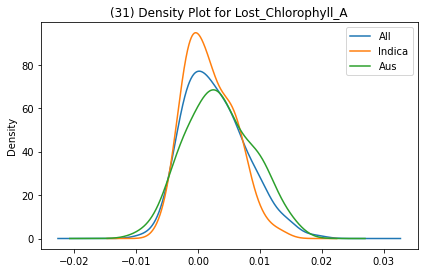

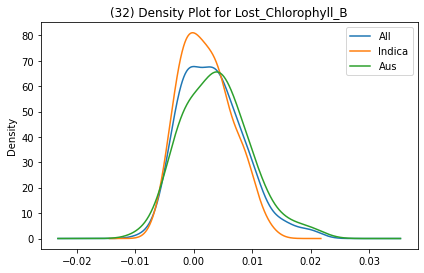

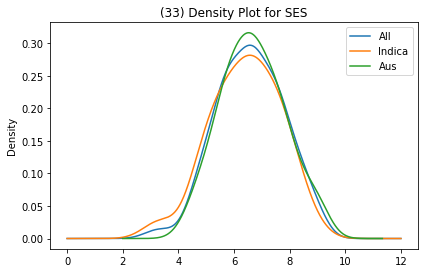

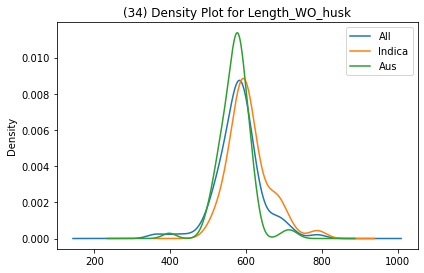

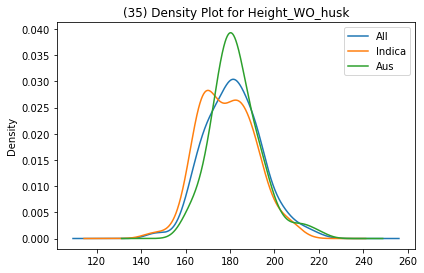

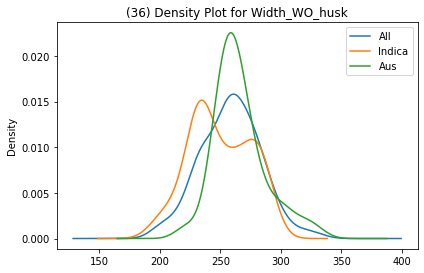

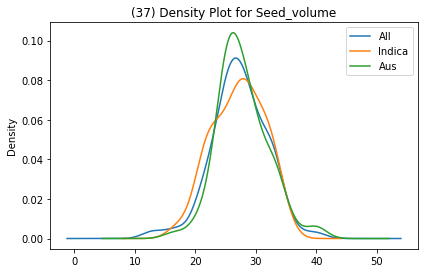

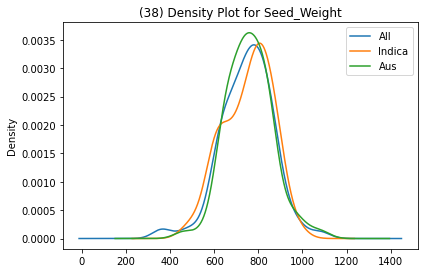

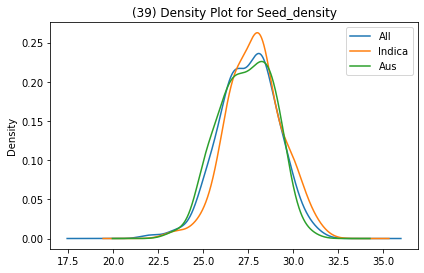

In [184]:
dfp = pd.DataFrame(columns = ['All', 'Indica', 'Aus'])
dfo.index = dfo['accession_name']
for i in range(1, dfo.shape[1]):
    #print(df.columns[i])
    #df.iloc[:,i].plot(kind='kde')
    #print((i - 1) % 8, round((i - 1) / 8))
    dfp.loc[:, 'All'] = dfo.iloc[:,i]
    dfp.loc[:, 'Indica'] = dfo.loc[['IRIS_313-10340',
 'IRIS_313-10341',
 'IRIS_313-10539',
 'IRIS_313-10971',
 'IRIS_313-10972',
 'IRIS_313-10973',
 'IRIS_313-10974',
 'IRIS_313-10975',
 'IRIS_313-10977',
 'IRIS_313-10978',
 'IRIS_313-10982',
 'IRIS_313-10983',
 'IRIS_313-10985',
 'IRIS_313-10986',
 'IRIS_313-11113',
 'IRIS_313-11114',
 'IRIS_313-11115',
 'IRIS_313-11203',
 'IRIS_313-11204',
 'IRIS_313-11205',
 'IRIS_313-11206',
 'IRIS_313-11207',
 'IRIS_313-11208',
 'IRIS_313-11211',
 'IRIS_313-11212',
 'IRIS_313-11219',
 'IRIS_313-11220',
 'IRIS_313-11221',
 'IRIS_313-11222',
 'IRIS_313-11224',
 'IRIS_313-11225',
 'IRIS_313-11226',
 'IRIS_313-11227',
 'IRIS_313-11228',
 'IRIS_313-11229',
 'IRIS_313-11230',
 'IRIS_313-11231',
 'IRIS_313-11241',
 'IRIS_313-11321',
 'IRIS_313-11326',
 'IRIS_313-11399',
 'IRIS_313-11400',
 'IRIS_313-11402',
 'IRIS_313-11404',
 'IRIS_313-11487',
 'IRIS_313-11558',
 'IRIS_313-11722',
 'IRIS_313-11945',
 'IRIS_313-11964',
 'IRIS_313-8244',
 'IRIS_313-8349',
 'IRIS_313-8437',
 'IRIS_313-8509',
 'IRIS_313-8632',
 'IRIS_313-8683',
 'IRIS_313-8703',
 'IRIS_313-8717',
 'IRIS_313-8733',
 'IRIS_313-8737',
 'IRIS_313-8850',
 'IRIS_313-8854',
 'IRIS_313-8930',
 'IRIS_313-8932',
 'IRIS_313-9049',
 'IRIS_313-9066',
 'IRIS_313-9067',
 'IRIS_313-9072',
 'IRIS_313-9108',
 'IRIS_313-9139',
 'IRIS_313-9148',
 'IRIS_313-9156',
 'IRIS_313-9174',
 'IRIS_313-9218',
 'IRIS_313-9262',
 'IRIS_313-9271',
 'IRIS_313-9325',
 'IRIS_313-9391',
 'IRIS_313-9397',
 'IRIS_313-9594',
 'IRIS_313-9606',
 'IRIS_313-9617',
 'IRIS_313-9696'], dfo.columns[i]]
    
    dfp.loc[:, 'Aus'] = dfo.loc[['IRIS_313-10587',
 'IRIS_313-10592',
 'IRIS_313-10593',
 'IRIS_313-10595',
 'IRIS_313-10598',
 'IRIS_313-10600',
 'IRIS_313-10602',
 'IRIS_313-10603',
 'IRIS_313-10604',
 'IRIS_313-10605',
 'IRIS_313-10606',
 'IRIS_313-10963',
 'IRIS_313-10964',
 'IRIS_313-10965',
 'IRIS_313-10976',
 'IRIS_313-10979',
 'IRIS_313-10981',
 'IRIS_313-10987',
 'IRIS_313-11013',
 'IRIS_313-11014',
 'IRIS_313-11015',
 'IRIS_313-11016',
 'IRIS_313-11017',
 'IRIS_313-11018',
 'IRIS_313-11019',
 'IRIS_313-11047',
 'IRIS_313-11048',
 'IRIS_313-11049',
 'IRIS_313-11050',
 'IRIS_313-11052',
 'IRIS_313-11053',
 'IRIS_313-11054',
 'IRIS_313-11056',
 'IRIS_313-11057',
 'IRIS_313-11058',
 'IRIS_313-11059',
 'IRIS_313-11060',
 'IRIS_313-11061',
 'IRIS_313-11063',
 'IRIS_313-11064',
 'IRIS_313-11065',
 'IRIS_313-11067',
 'IRIS_313-11111',
 'IRIS_313-11112',
 'IRIS_313-11116',
 'IRIS_313-11123',
 'IRIS_313-11124',
 'IRIS_313-11154',
 'IRIS_313-11163',
 'IRIS_313-11210',
 'IRIS_313-11213',
 'IRIS_313-11214',
 'IRIS_313-11216',
 'IRIS_313-11322',
 'IRIS_313-11323',
 'IRIS_313-11324',
 'IRIS_313-11481',
 'IRIS_313-11482',
 'IRIS_313-11483',
 'IRIS_313-11484',
 'IRIS_313-11557',
 'IRIS_313-12002',
 'IRIS_313-12055',
 'IRIS_313-12141',
 'IRIS_313-8252',
 'IRIS_313-8283',
 'IRIS_313-8321',
 'IRIS_313-8410',
 'IRIS_313-8641',
 'IRIS_313-8721',
 'IRIS_313-8789',
 'IRIS_313-8822',
 'IRIS_313-8864',
 'IRIS_313-8963',
 'IRIS_313-9368',
 'IRIS_313-9422',
 'IRIS_313-9626',
 'IRIS_313-9661'], dfo.columns[i]]
    
    #fig, ax = plt.subplots(figsize=(6 , 5))    
    dfp.plot(kind='kde')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    plt.title('(%d) Density Plot for %s' % (i, dfo.columns[i]))
    plt.savefig('../../Plots/%d %s.png' % (i, dfo.columns[i]))